In [27]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns
sns.set('notebook')
from __future__ import division
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (18,8)
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
%config InlineBackend.figure_format = 'retina'

## Visitantes hospedajes turísticos del Perú por meses y años

In [28]:
data_set_1 = pd.read_excel('rptaniomes_a.xls',sheet_name='rptaniomes',nrows=12,
                           skiprows=3,index_col=0,)
data_set_1

,2004,2005,2006,2007,2008,2009,2010,2011,Unnamed: 9,Unnamed: 10,2012,2013,2014,2015,2016,2017,2018
Enero,1420318,1549611,1453010,1640530,1908782,2157086,2481001,2875789,NaN,NaN,3368321,3824017,3785834,3946743,4394706,4377928,4701689.0
Febrero,1378193,1506757,1416817,1618220,1893422,2095366,2287053,2776543,NaN,NaN,3243486,3637264,3713502,3852850,4269580,4168647,4634612.0
Marzo,1452044,1647629,1508036,1761946,2020172,2123012,2378428,2950707,NaN,NaN,3321767,3858708,3819804,3921180,4236281,4096350,4624401.0
Abril,1443234,1579655,1528134,1781544,1914748,2125960,2448616,2894167,NaN,NaN,3322076,3627288,3734511,3733996,4021212,4129642,4410177.0
Mayo,1456655,1615637,1507493,1769547,2059807,2176022,2575576,2990604,NaN,NaN,3420816,3876882,3840284,3967218,4190828,4272485,4590470.0
Junio,1453778,1608856,1491043,1795797,1967317,2087684,2510546,2954453,NaN,NaN,3451280,3829325,3666169,3846446,3884905,4076724,4247453.0
Julio,1660090,1844513,1742885,1934685,2254533,2371392,2881280,3373290,NaN,NaN,3726624,4178428,4026351,4246979,4535388,4726366,4985381.0
Agosto,1642581,1802806,1776761,1951739,2286921,2335697,2838218,3262290,NaN,NaN,3783340,4156695,4112468,4159557,4420995,4577075,4877017.0
Septiembre,1480796,1660168,1624773,1798843,2075029,2233111,2602236,3063591,NaN,NaN,3652406,3843260,3780242,3880323,4097249,4292631,4597647.0
Octubre,1614864,1784227,1741021,1890913,2231985,2439174,2877754,3306183,NaN,NaN,3752538,4029520,3958797,4226737,4387730,4353795,NaN


In [29]:
def clean_dataframe(df):
    df.dropna(axis=1,how='all',inplace=True)
    columns_navalue =  df.columns[df.isna().any()].tolist()
    # set last value
    if columns_navalue != []:
        df.ix[-1,columns_navalue] = df[columns_navalue].median()
        df[columns_navalue] = df[columns_navalue].interpolate()

In [30]:
clean_dataframe(data_set_1)
data_set_1

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Enero,1420318,1549611,1453010,1640530,1908782,2157086,2481001,2875789,3368321,3824017,3785834,3946743,4394706,4377928,4701689.0
Febrero,1378193,1506757,1416817,1618220,1893422,2095366,2287053,2776543,3243486,3637264,3713502,3852850,4269580,4168647,4634612.0
Marzo,1452044,1647629,1508036,1761946,2020172,2123012,2378428,2950707,3321767,3858708,3819804,3921180,4236281,4096350,4624401.0
Abril,1443234,1579655,1528134,1781544,1914748,2125960,2448616,2894167,3322076,3627288,3734511,3733996,4021212,4129642,4410177.0
Mayo,1456655,1615637,1507493,1769547,2059807,2176022,2575576,2990604,3420816,3876882,3840284,3967218,4190828,4272485,4590470.0
Junio,1453778,1608856,1491043,1795797,1967317,2087684,2510546,2954453,3451280,3829325,3666169,3846446,3884905,4076724,4247453.0
Julio,1660090,1844513,1742885,1934685,2254533,2371392,2881280,3373290,3726624,4178428,4026351,4246979,4535388,4726366,4985381.0
Agosto,1642581,1802806,1776761,1951739,2286921,2335697,2838218,3262290,3783340,4156695,4112468,4159557,4420995,4577075,4877017.0
Septiembre,1480796,1660168,1624773,1798843,2075029,2233111,2602236,3063591,3652406,3843260,3780242,3880323,4097249,4292631,4597647.0
Octubre,1614864,1784227,1741021,1890913,2231985,2439174,2877754,3306183,3752538,4029520,3958797,4226737,4387730,4353795,4606565.0


In [31]:
def plot_df(df,by_month = False,title ='Tourist'):
    col_name = 'Year'
    if by_month == True:
        df = df.T
        col_name = 'Month'
    info = df.sum().to_frame().reset_index()
    info.columns = [col_name,'Tourist_count']
    sns.barplot(data=info,x=col_name,y='Tourist_count')
    xx, locs = plt.yticks()
    ll = ['{:,}'.format(a) for a in xx]
    plt.yticks(xx[:-1], ll[:-1])
    plt.title(title)
    plt.show();

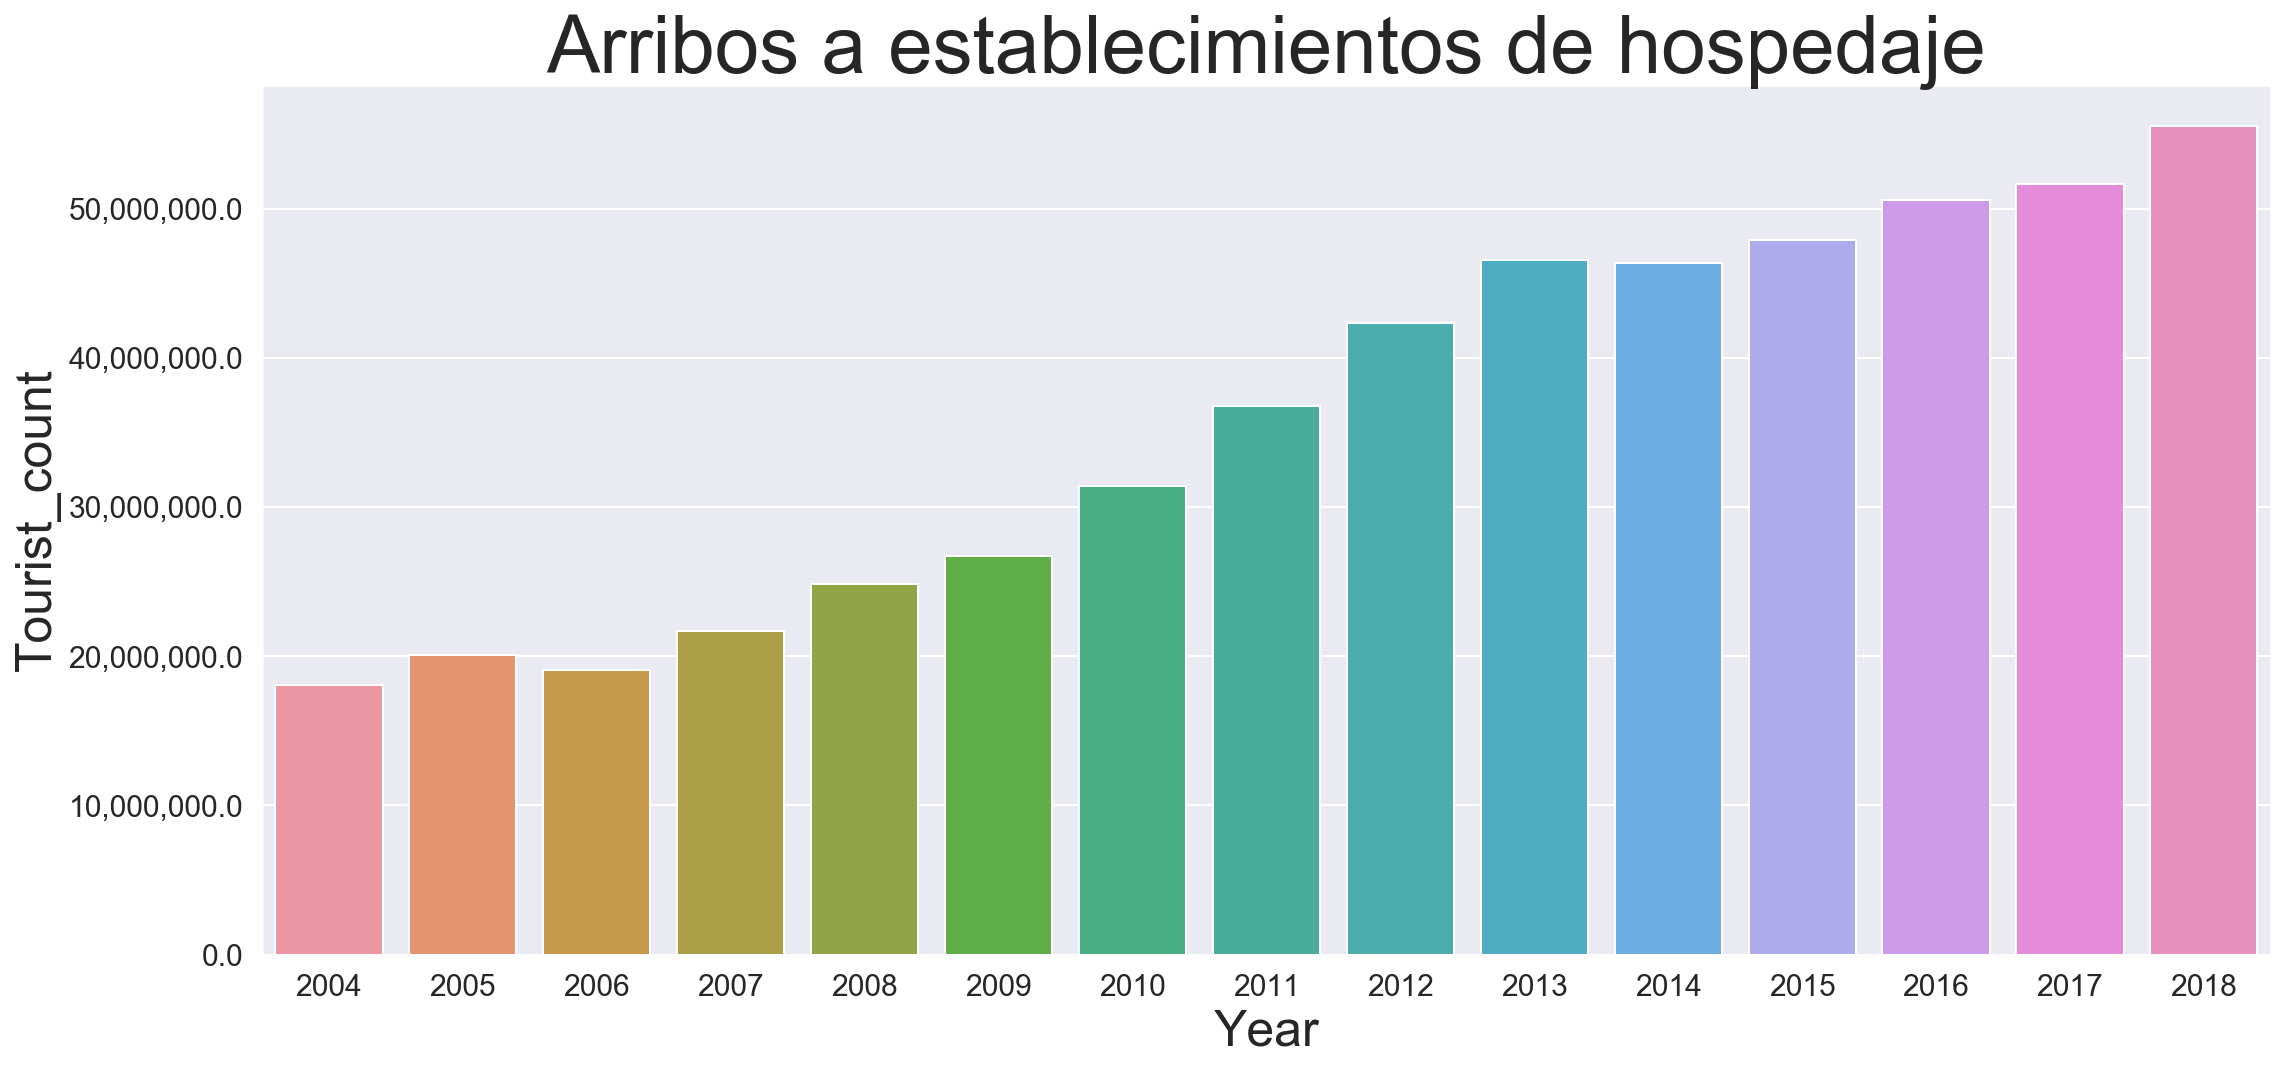

In [32]:
plot_df(data_set_1,title='Arribos a establecimientos de hospedaje')

In [33]:
def show_descriptive_data(name_file,by_month = False,title ='Tourist'):
    df = pd.read_excel(name_file,sheet_name='rptaniomes',nrows=12,
                           skiprows=3,index_col=0,)
    clean_dataframe(df)
    plot_df(df,by_month,title)

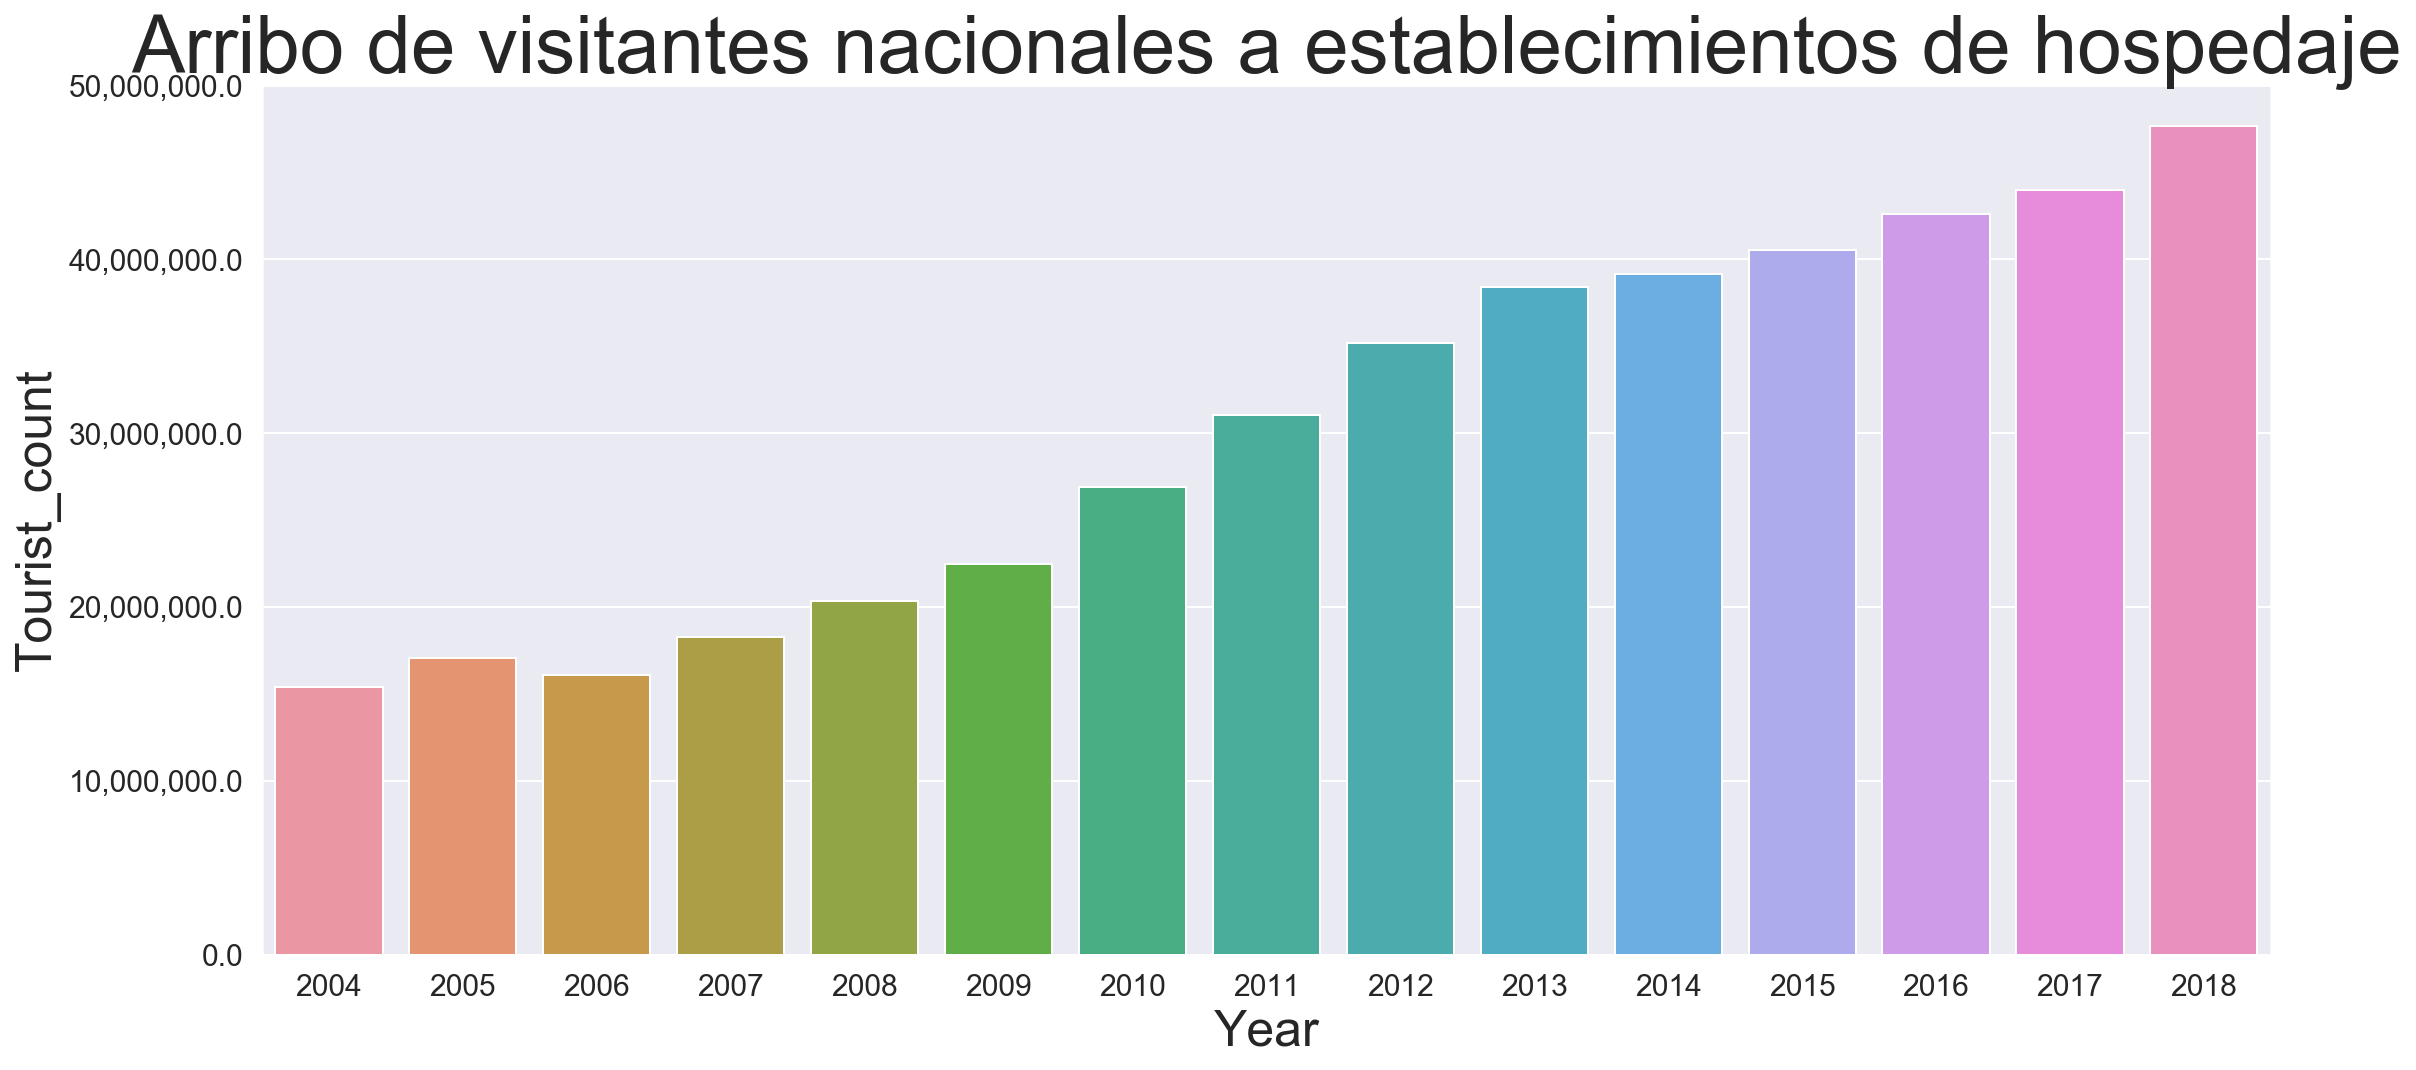

In [34]:
show_descriptive_data('rptaniomes_b.xls',title='Arribo de visitantes nacionales a establecimientos de hospedaje')

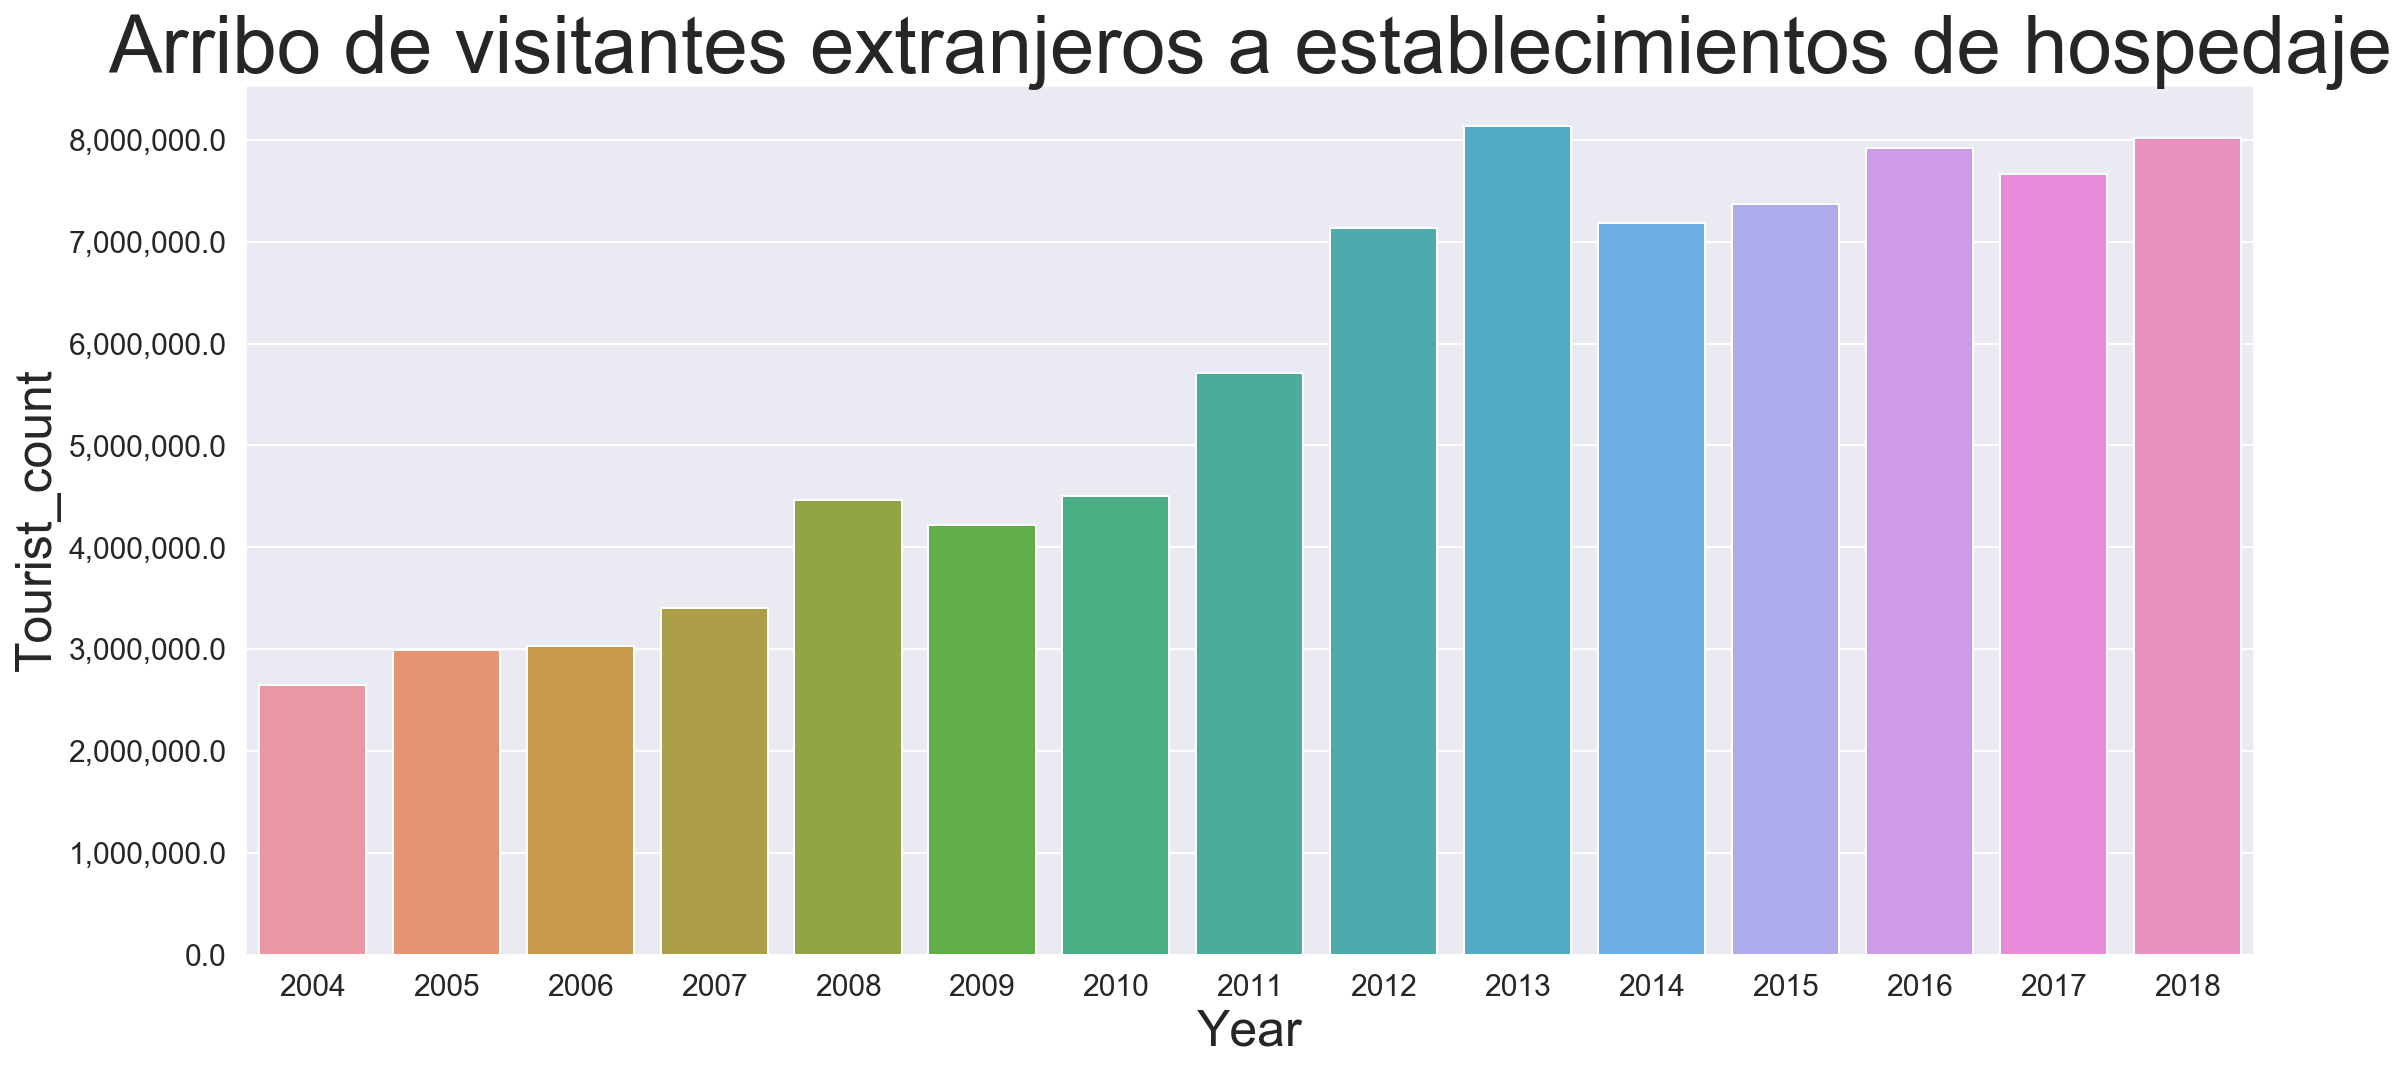

In [35]:
show_descriptive_data('rptaniomes_c.xls',title='Arribo de visitantes extranjeros a establecimientos de hospedaje')

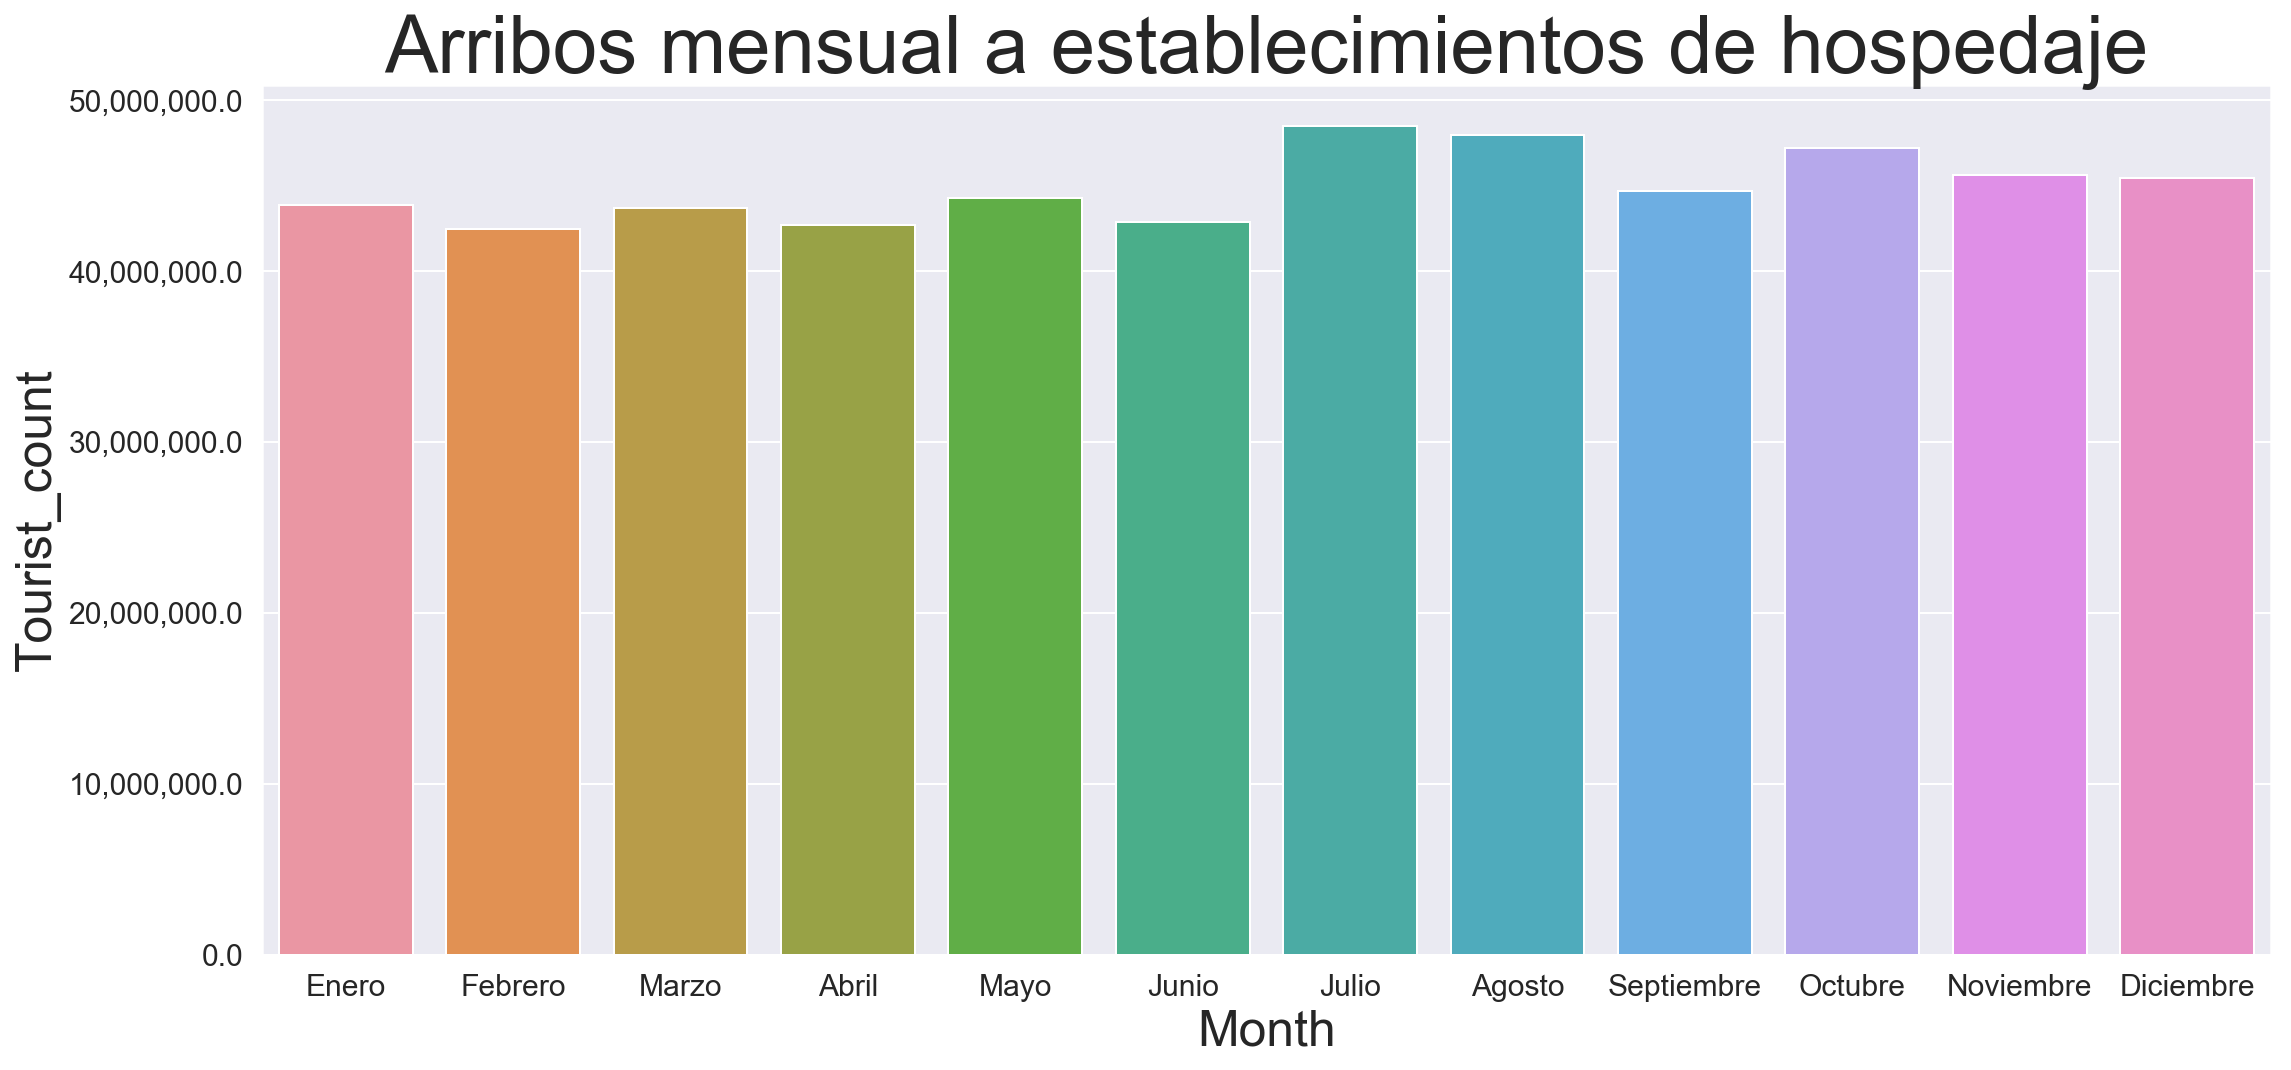

In [36]:
show_descriptive_data('rptaniomes_a.xls',by_month=True,title='Arribos mensual a establecimientos de hospedaje')

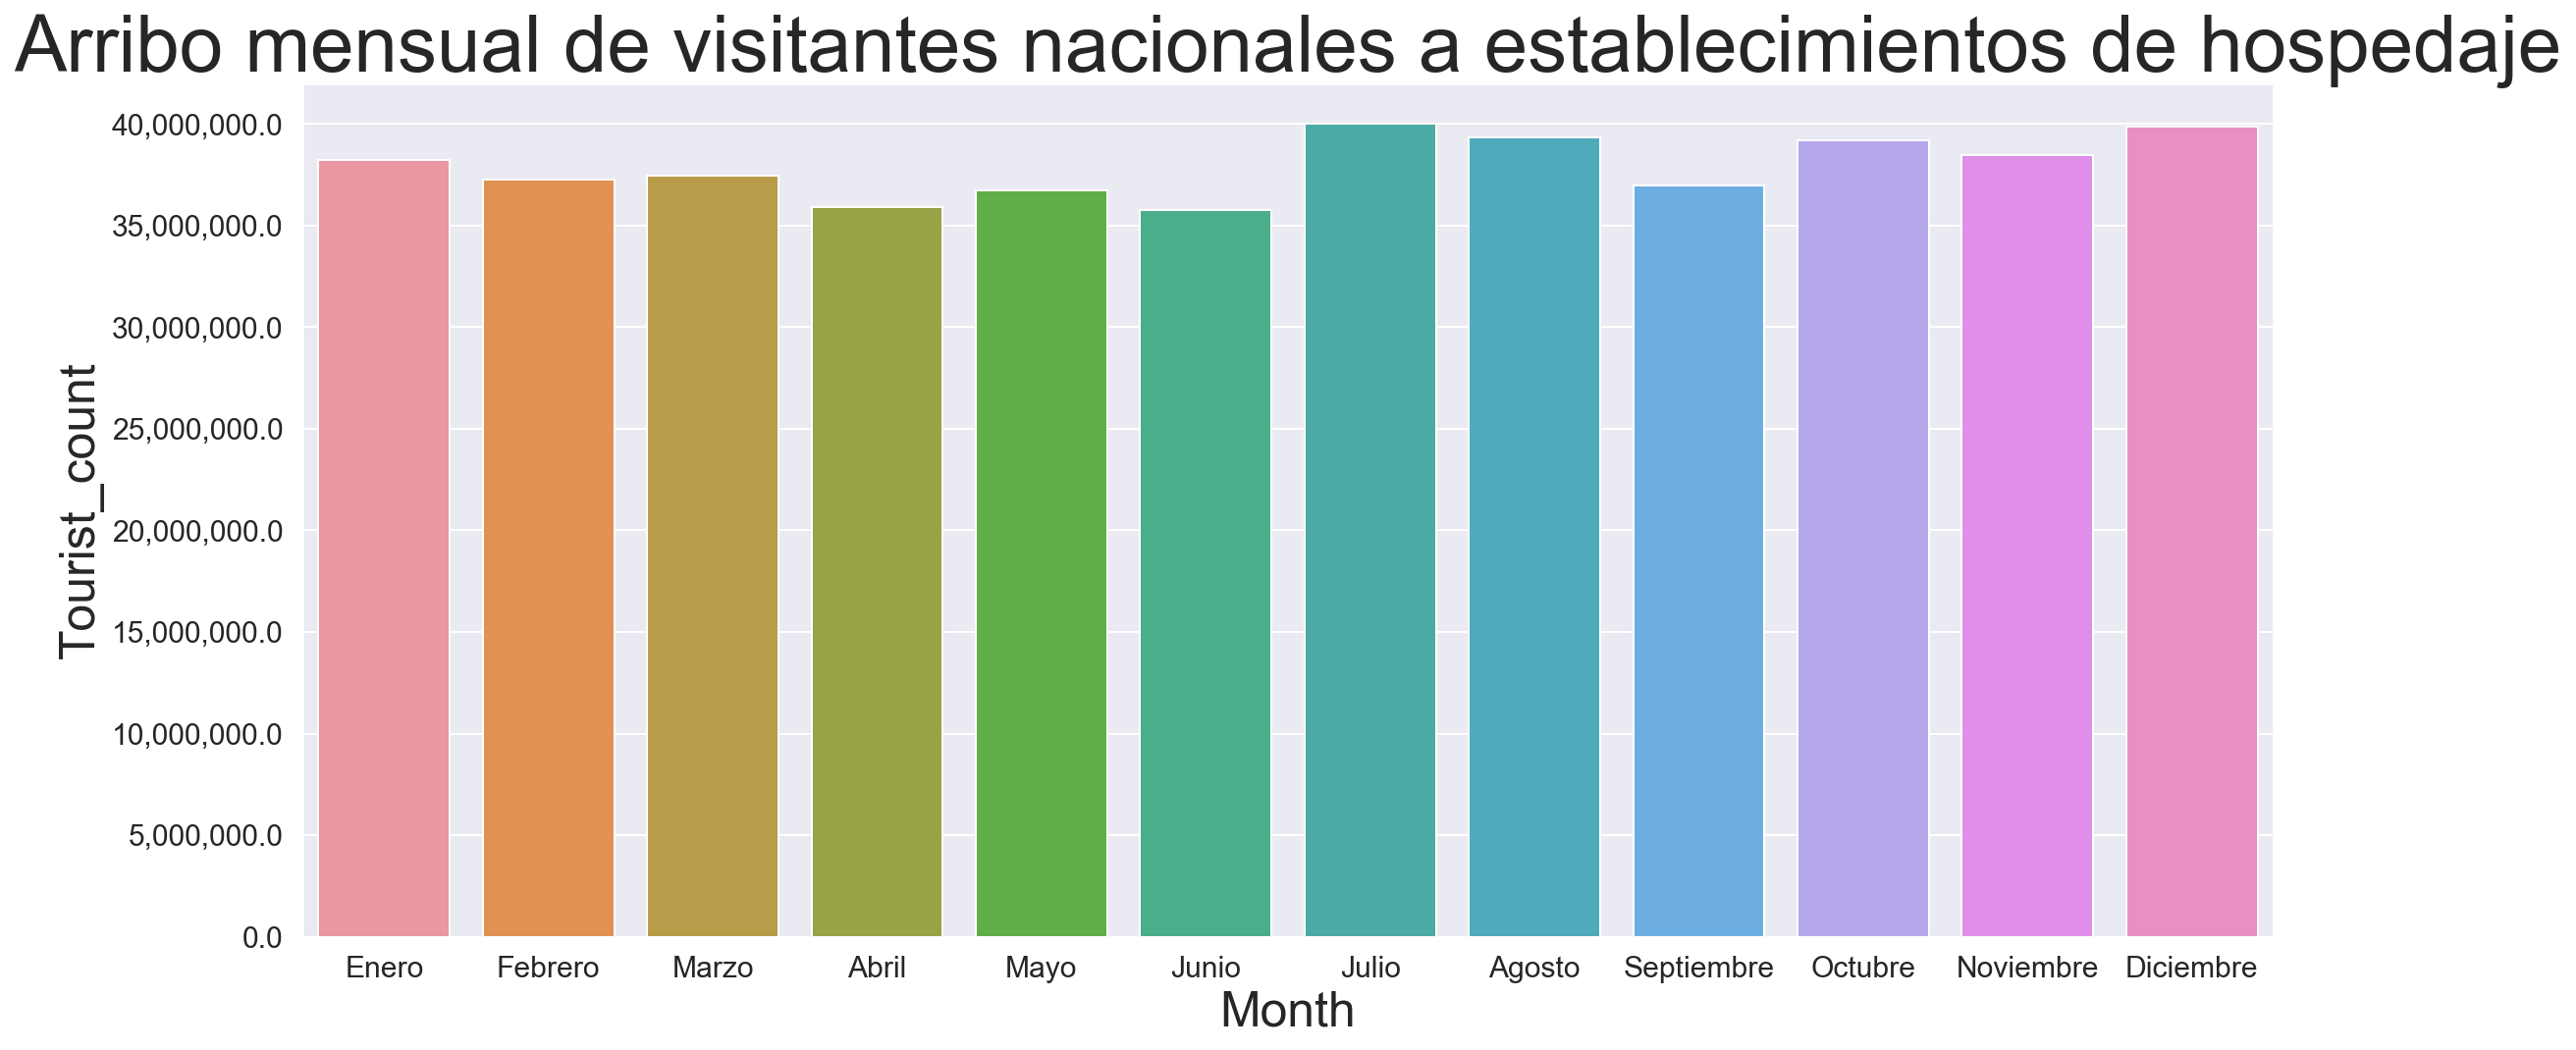

In [37]:
show_descriptive_data('rptaniomes_b.xls',by_month=True,title='Arribo mensual de visitantes nacionales a establecimientos de hospedaje')

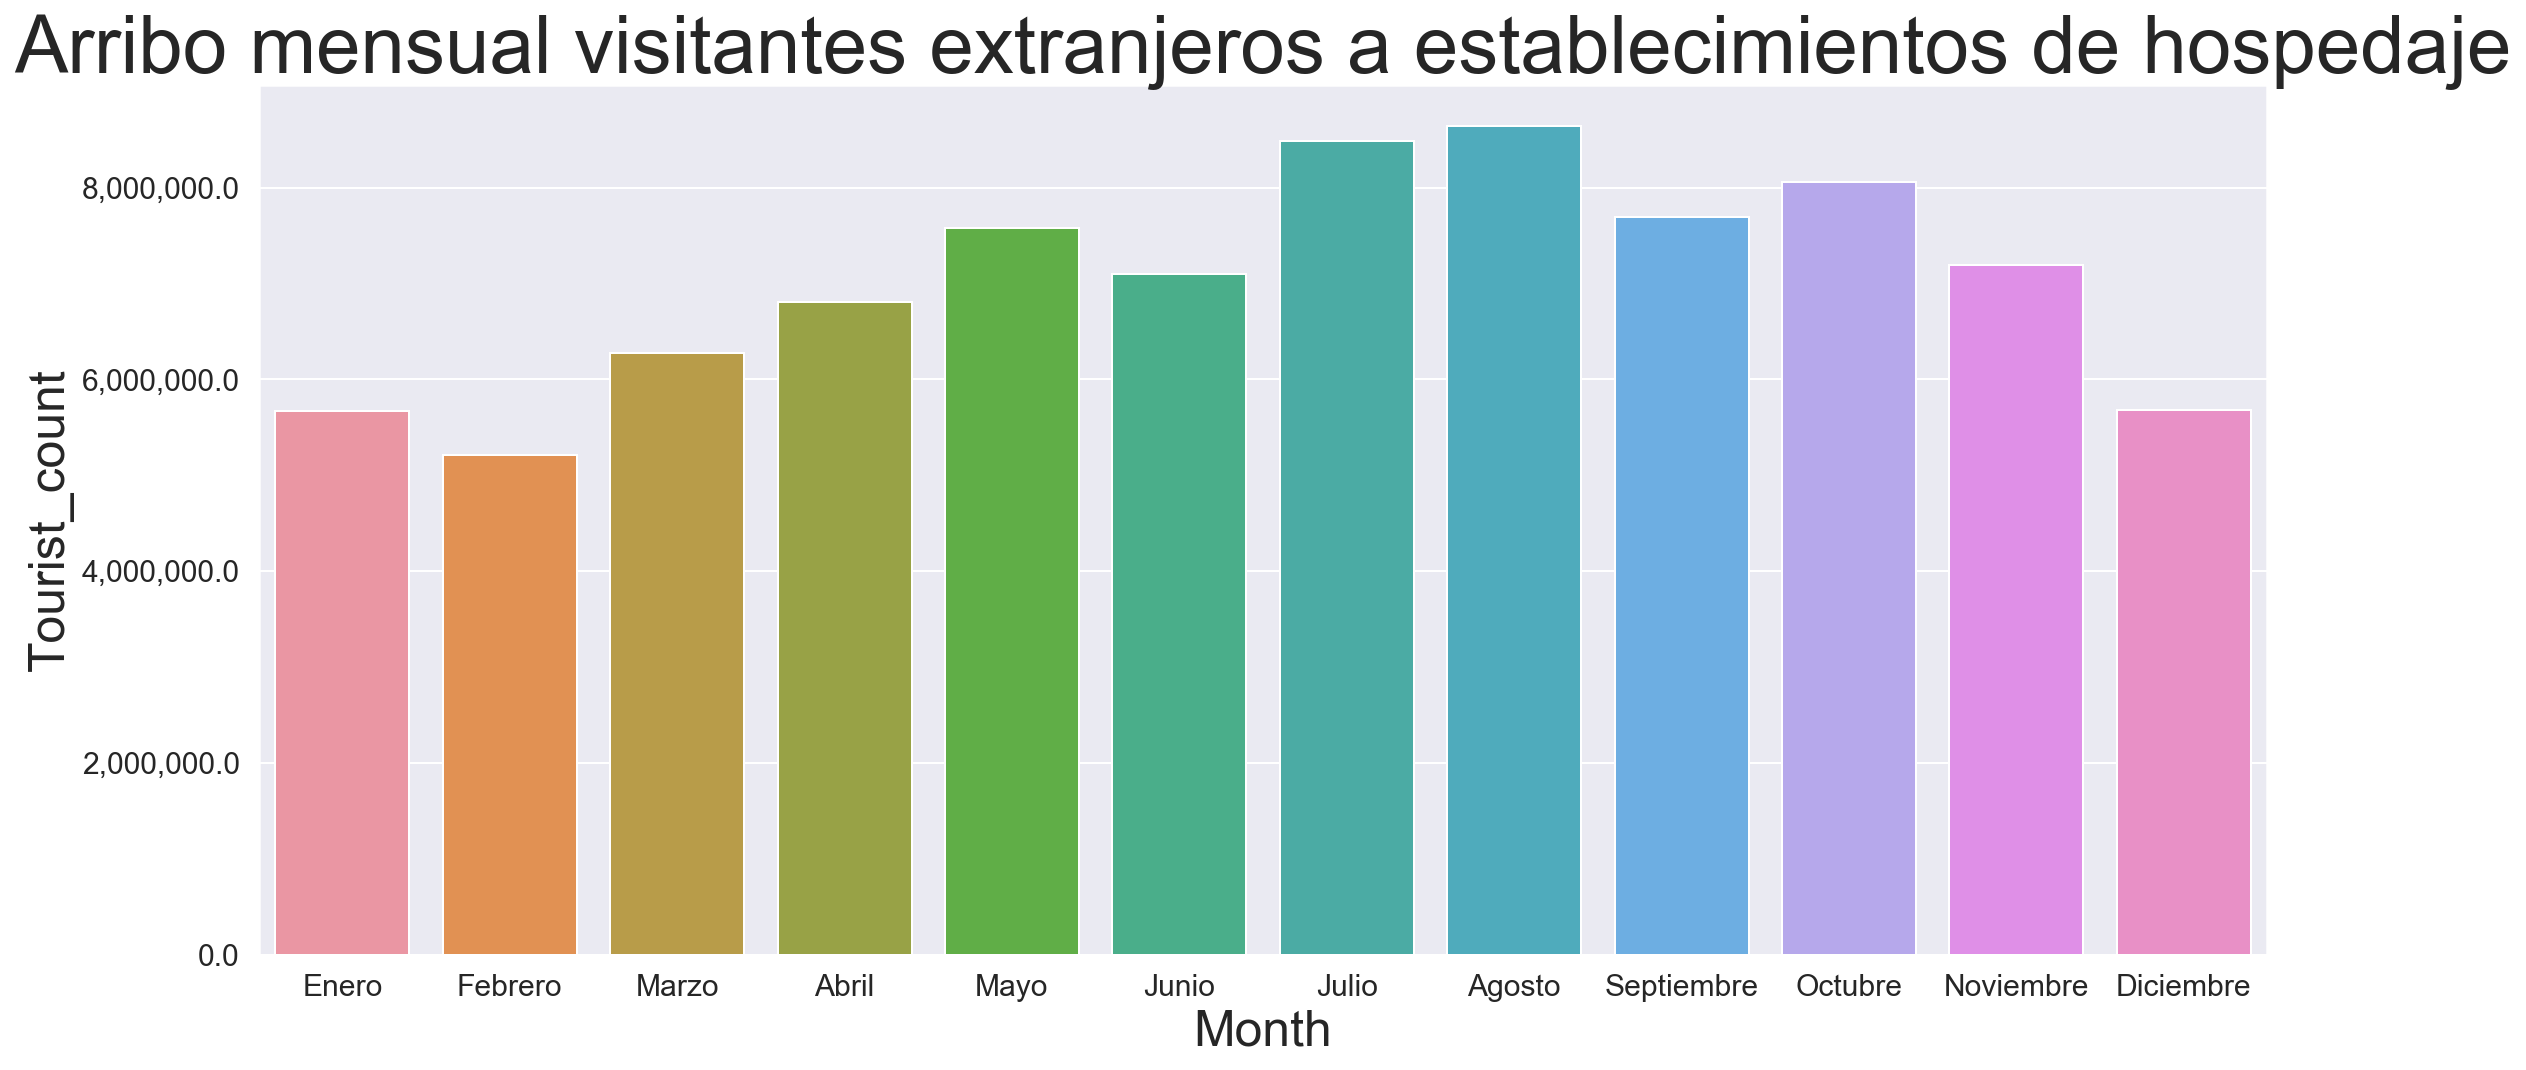

In [38]:
show_descriptive_data('rptaniomes_c.xls',by_month=True,title='Arribo mensual visitantes extranjeros a establecimientos de hospedaje')

In [39]:
dic = dict(Enero=1,Febrero=2,Marzo=3,Abril=4,Mayo=5,Junio=6,Julio=7,
           Agosto=8,Septiembre=9,Octubre=10,Noviembre=11,Diciembre=12)

def predict_plot(name_file,title):
    df = pd.read_excel(name_file,sheet_name='rptaniomes',nrows=12,
                           skiprows=3,index_col=0,)
    clean_dataframe(df)
    df = pd.melt(df.reset_index(), 
                id_vars='index', 
                value_vars=list(df.columns[1:]), # list of days of the week
                var_name='Year', 
                value_name='Sum of Tourist')
    df['Date'] = df['index'].map(dic)
    df.Date = df.apply(lambda row: pd.datetime(int(row['Year']), row['Date'],1), axis=1)
    df.set_index('Date',inplace=True)
    mod = sm.tsa.statespace.SARIMAX(df['Sum of Tourist'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
    pred = results.get_prediction(start=pd.to_datetime('2018-09-01'),end=pd.to_datetime('2021-01-01'), dynamic=False)
    pred_ci = pred.conf_int()
    ax = df['2004':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Furniture Sales')
    plt.title(title)
    plt.legend()
    plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0394      0.270      0.146      0.884      -0.490       0.569
ma.L1         -0.4539      0.239     -1.901      0.057      -0.922       0.014
ar.S.L12      -0.3990      0.084     -4.734      0.000      -0.564      -0.234
sigma2      1.034e+10   1.42e-11   7.27e+20      0.000    1.03e+10    1.03e+10


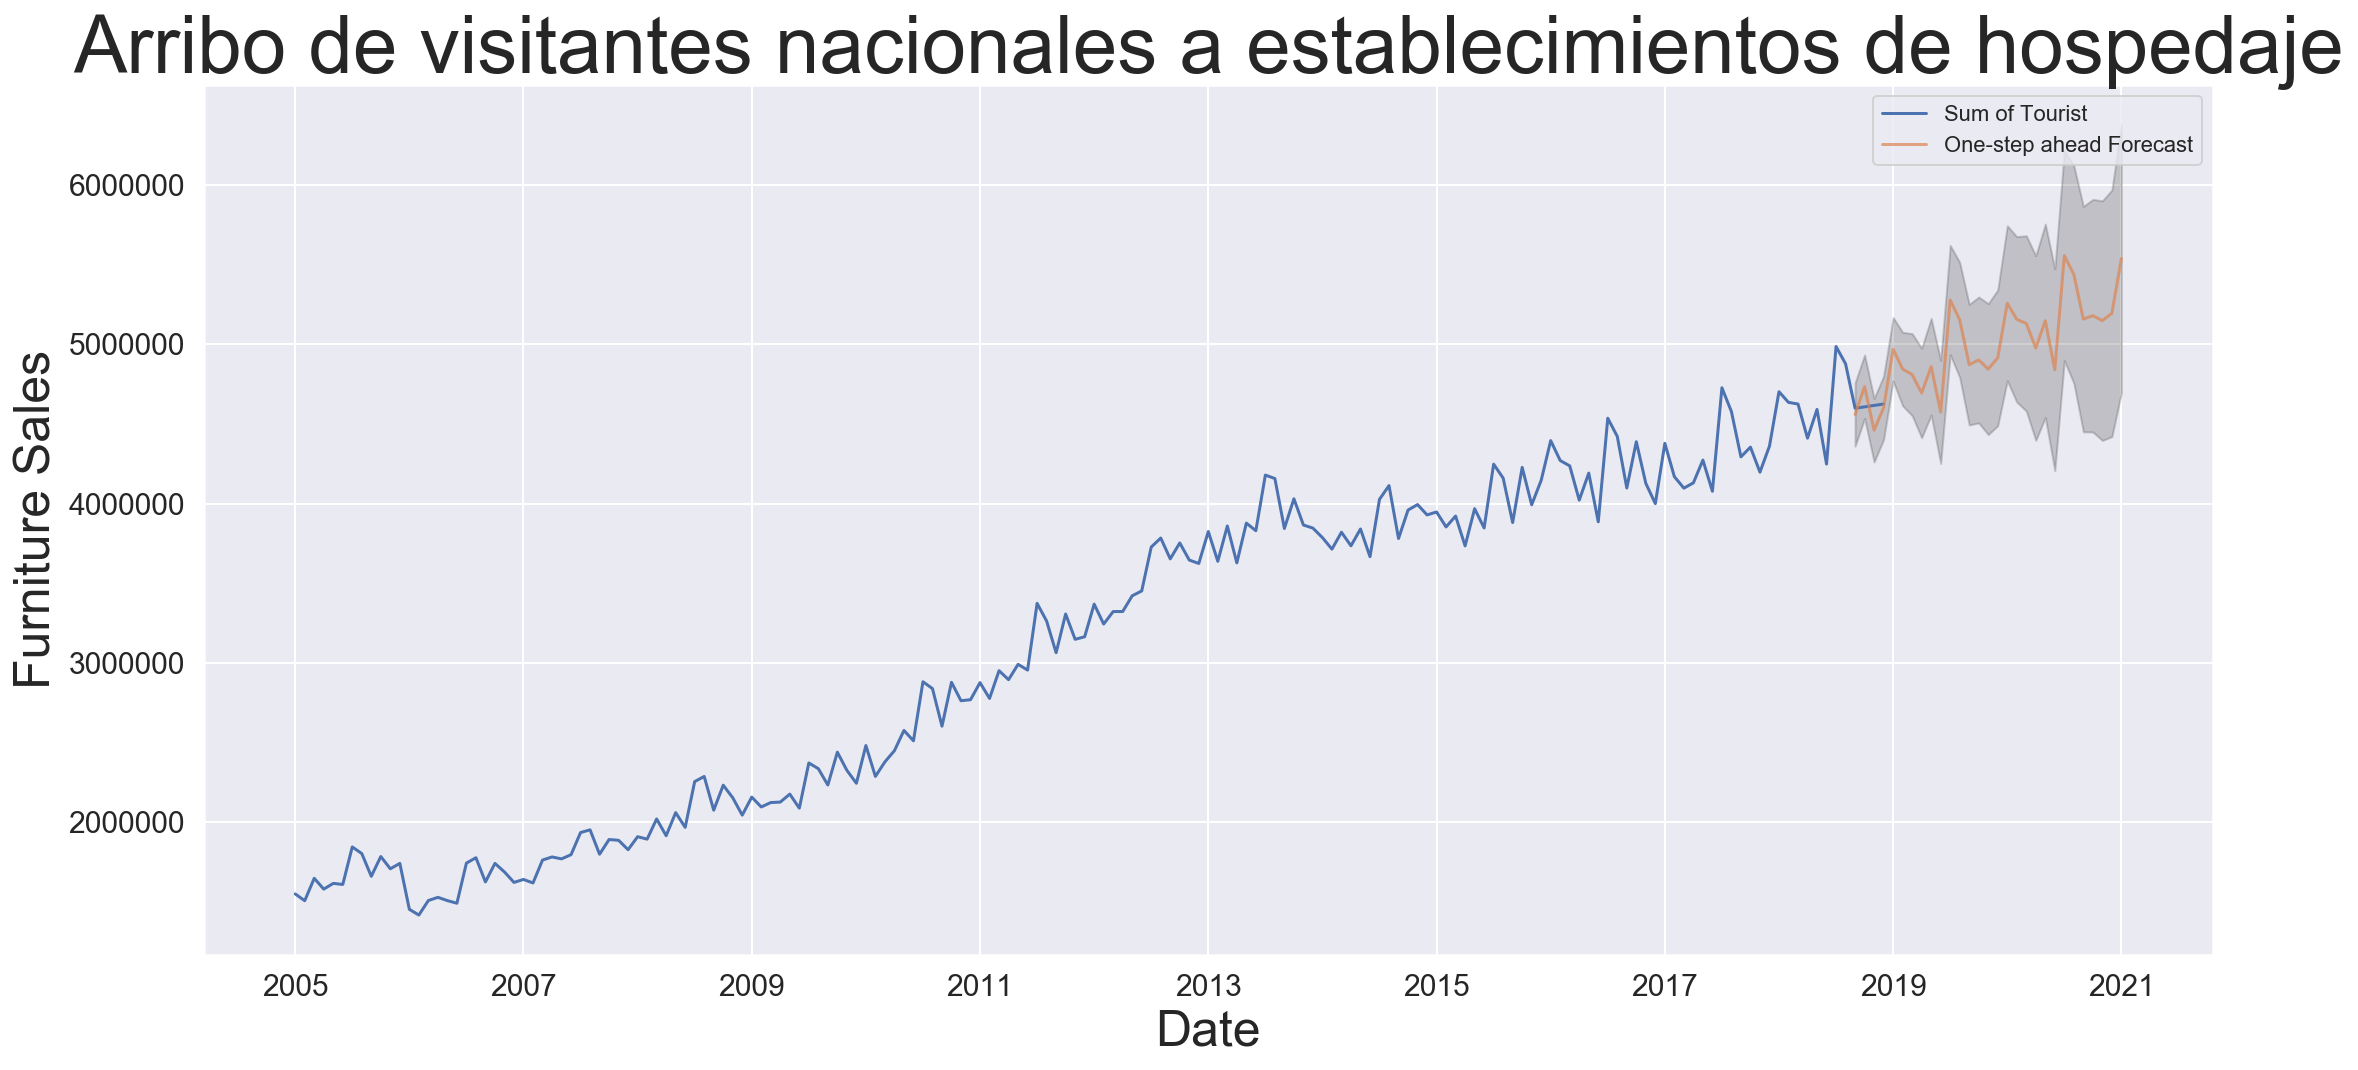

In [40]:
predict_plot('rptaniomes_a.xls',title='Arribo de visitantes nacionales a establecimientos de hospedaje')

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1821      0.222      0.821      0.411      -0.252       0.617
ma.L1         -0.6235      0.171     -3.637      0.000      -0.960      -0.287
ar.S.L12      -0.4229      0.088     -4.789      0.000      -0.596      -0.250
sigma2      7.556e+09   1.95e-11   3.88e+20      0.000    7.56e+09    7.56e+09


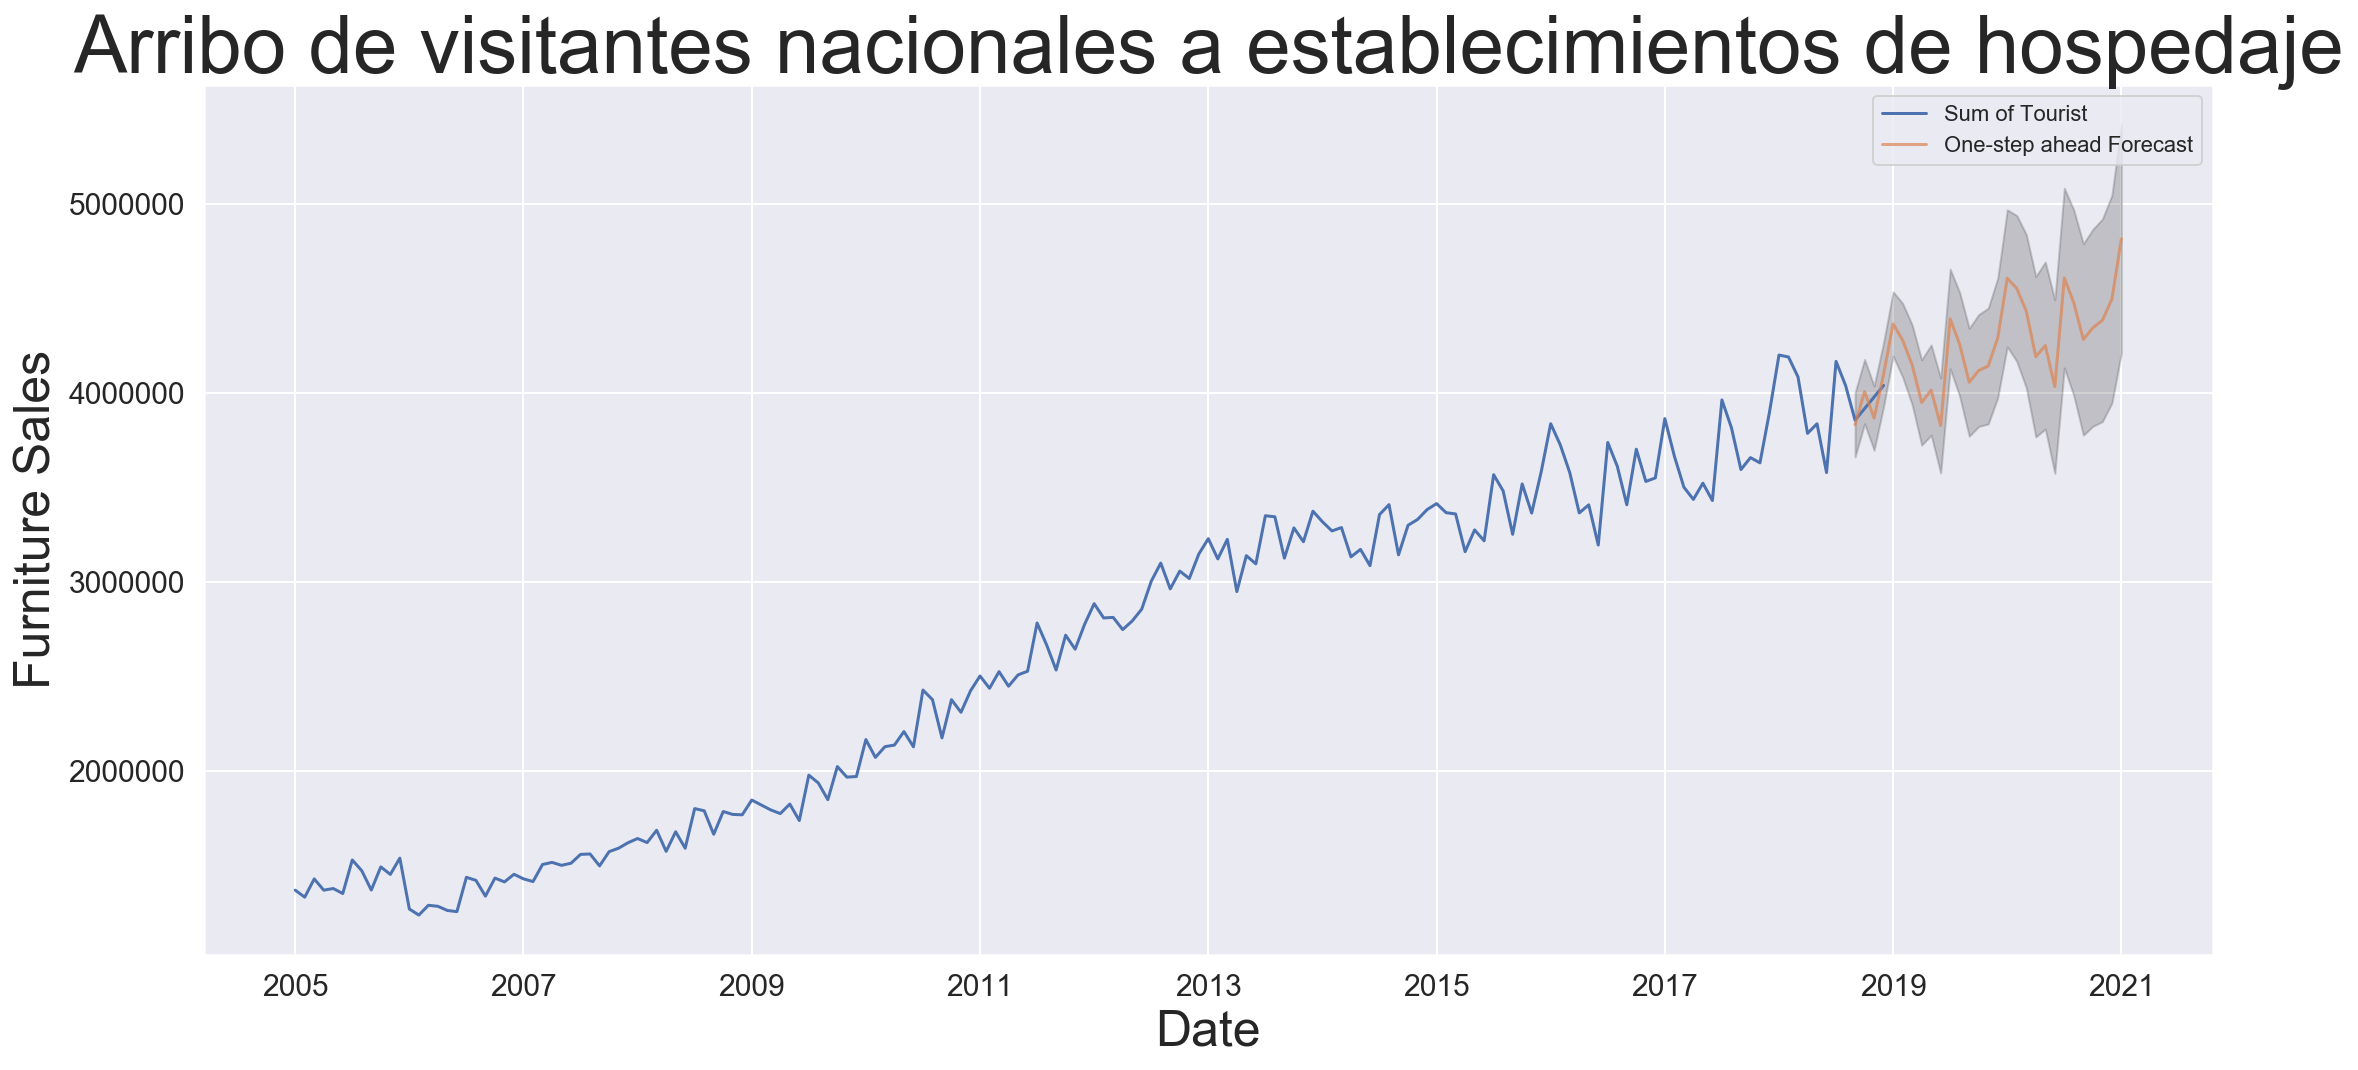

In [41]:
predict_plot('rptaniomes_b.xls',title='Arribo de visitantes nacionales a establecimientos de hospedaje')

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8449      0.110      7.664      0.000       0.629       1.061
ma.L1         -0.9245      0.081    -11.466      0.000      -1.083      -0.766
ar.S.L12      -0.3793      0.095     -3.976      0.000      -0.566      -0.192
sigma2      1.668e+09   2.06e-11   8.09e+19      0.000    1.67e+09    1.67e+09


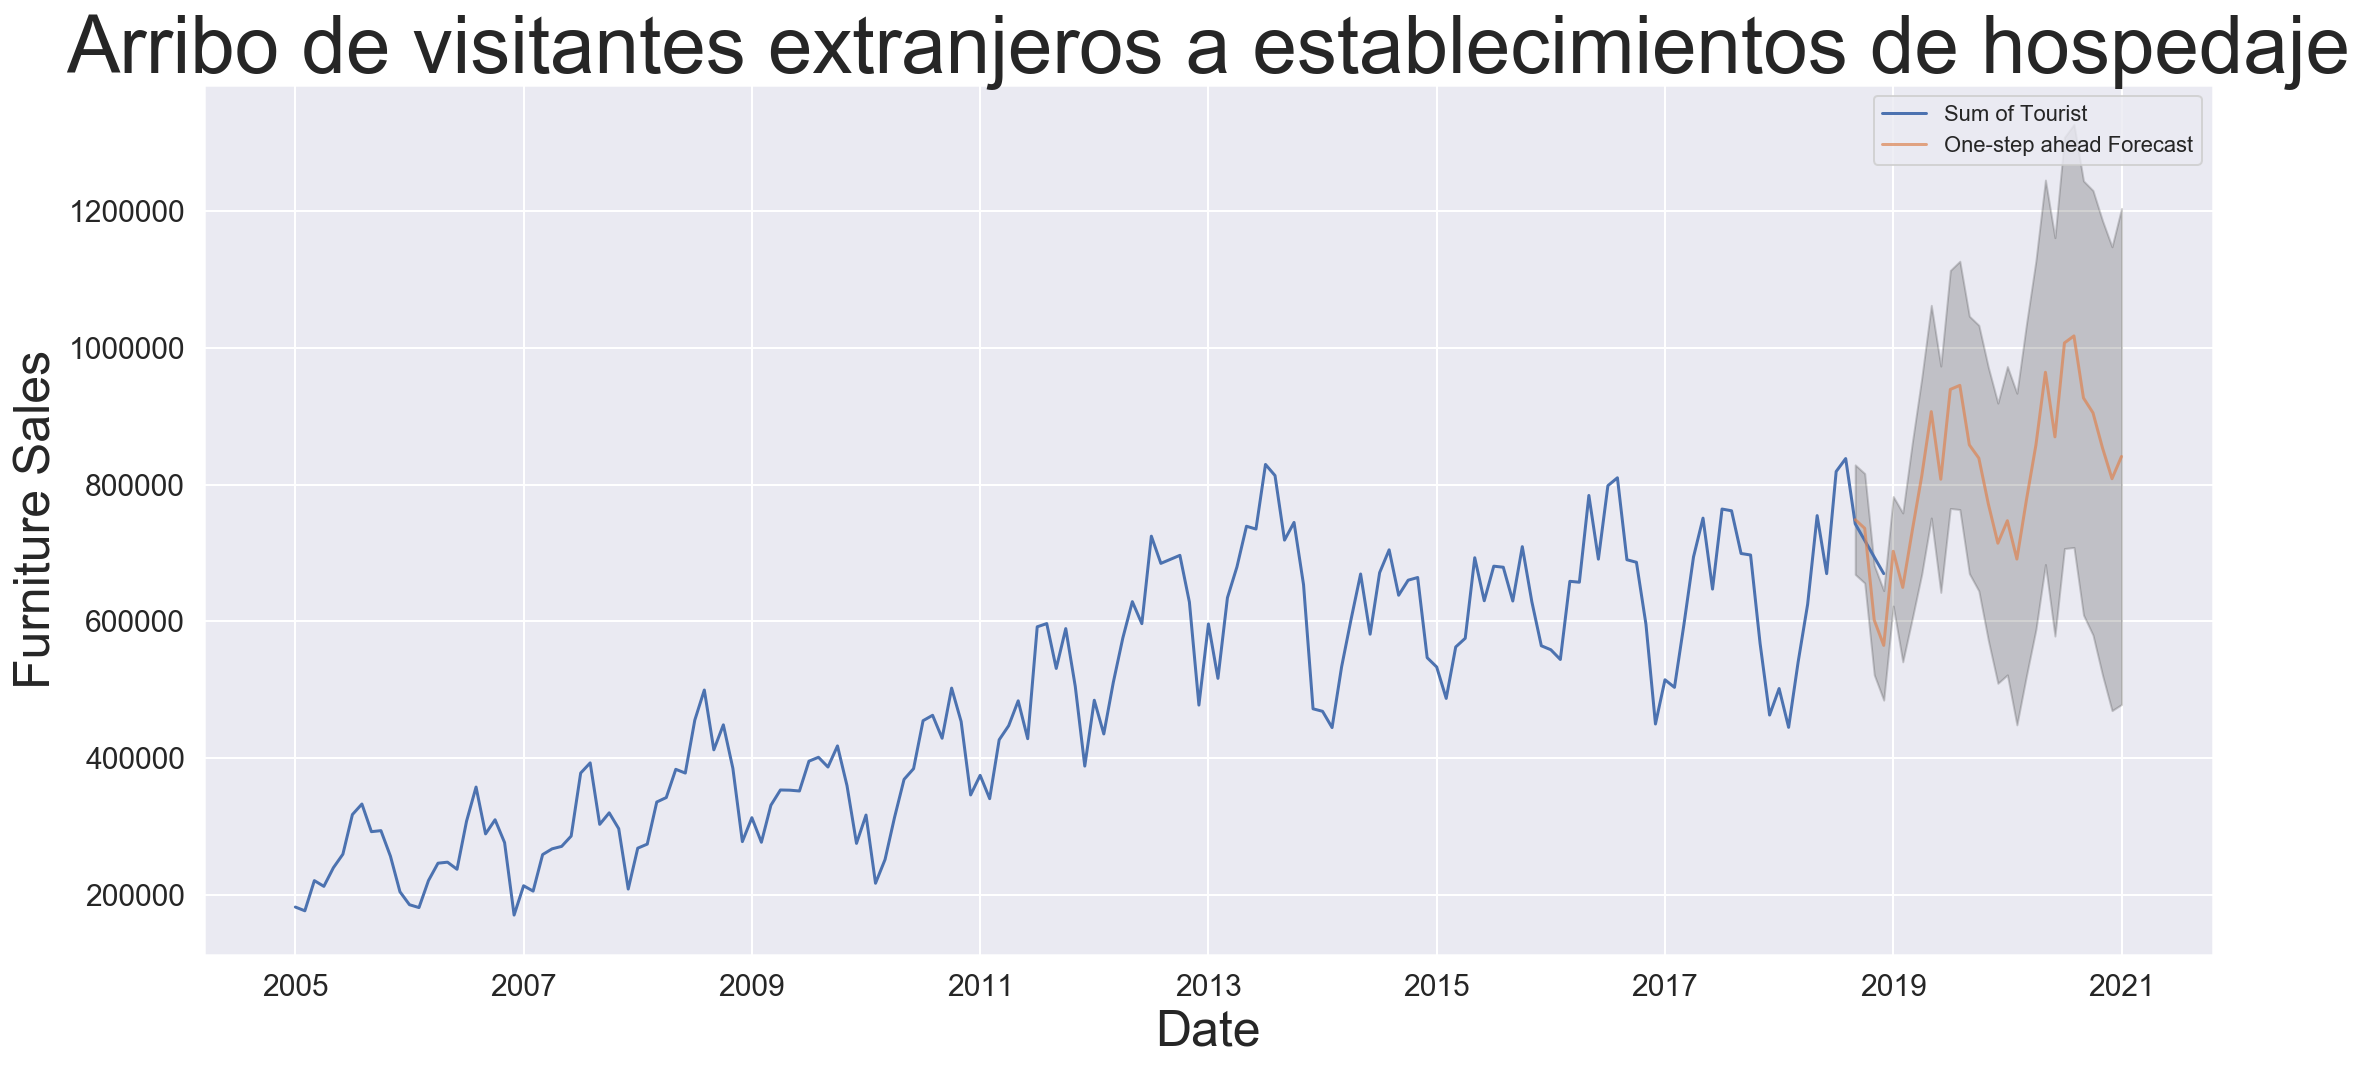

In [42]:
predict_plot('rptaniomes_c.xls',title='Arribo de visitantes extranjeros a establecimientos de hospedaje')

## Por Regiones hasta el 2017

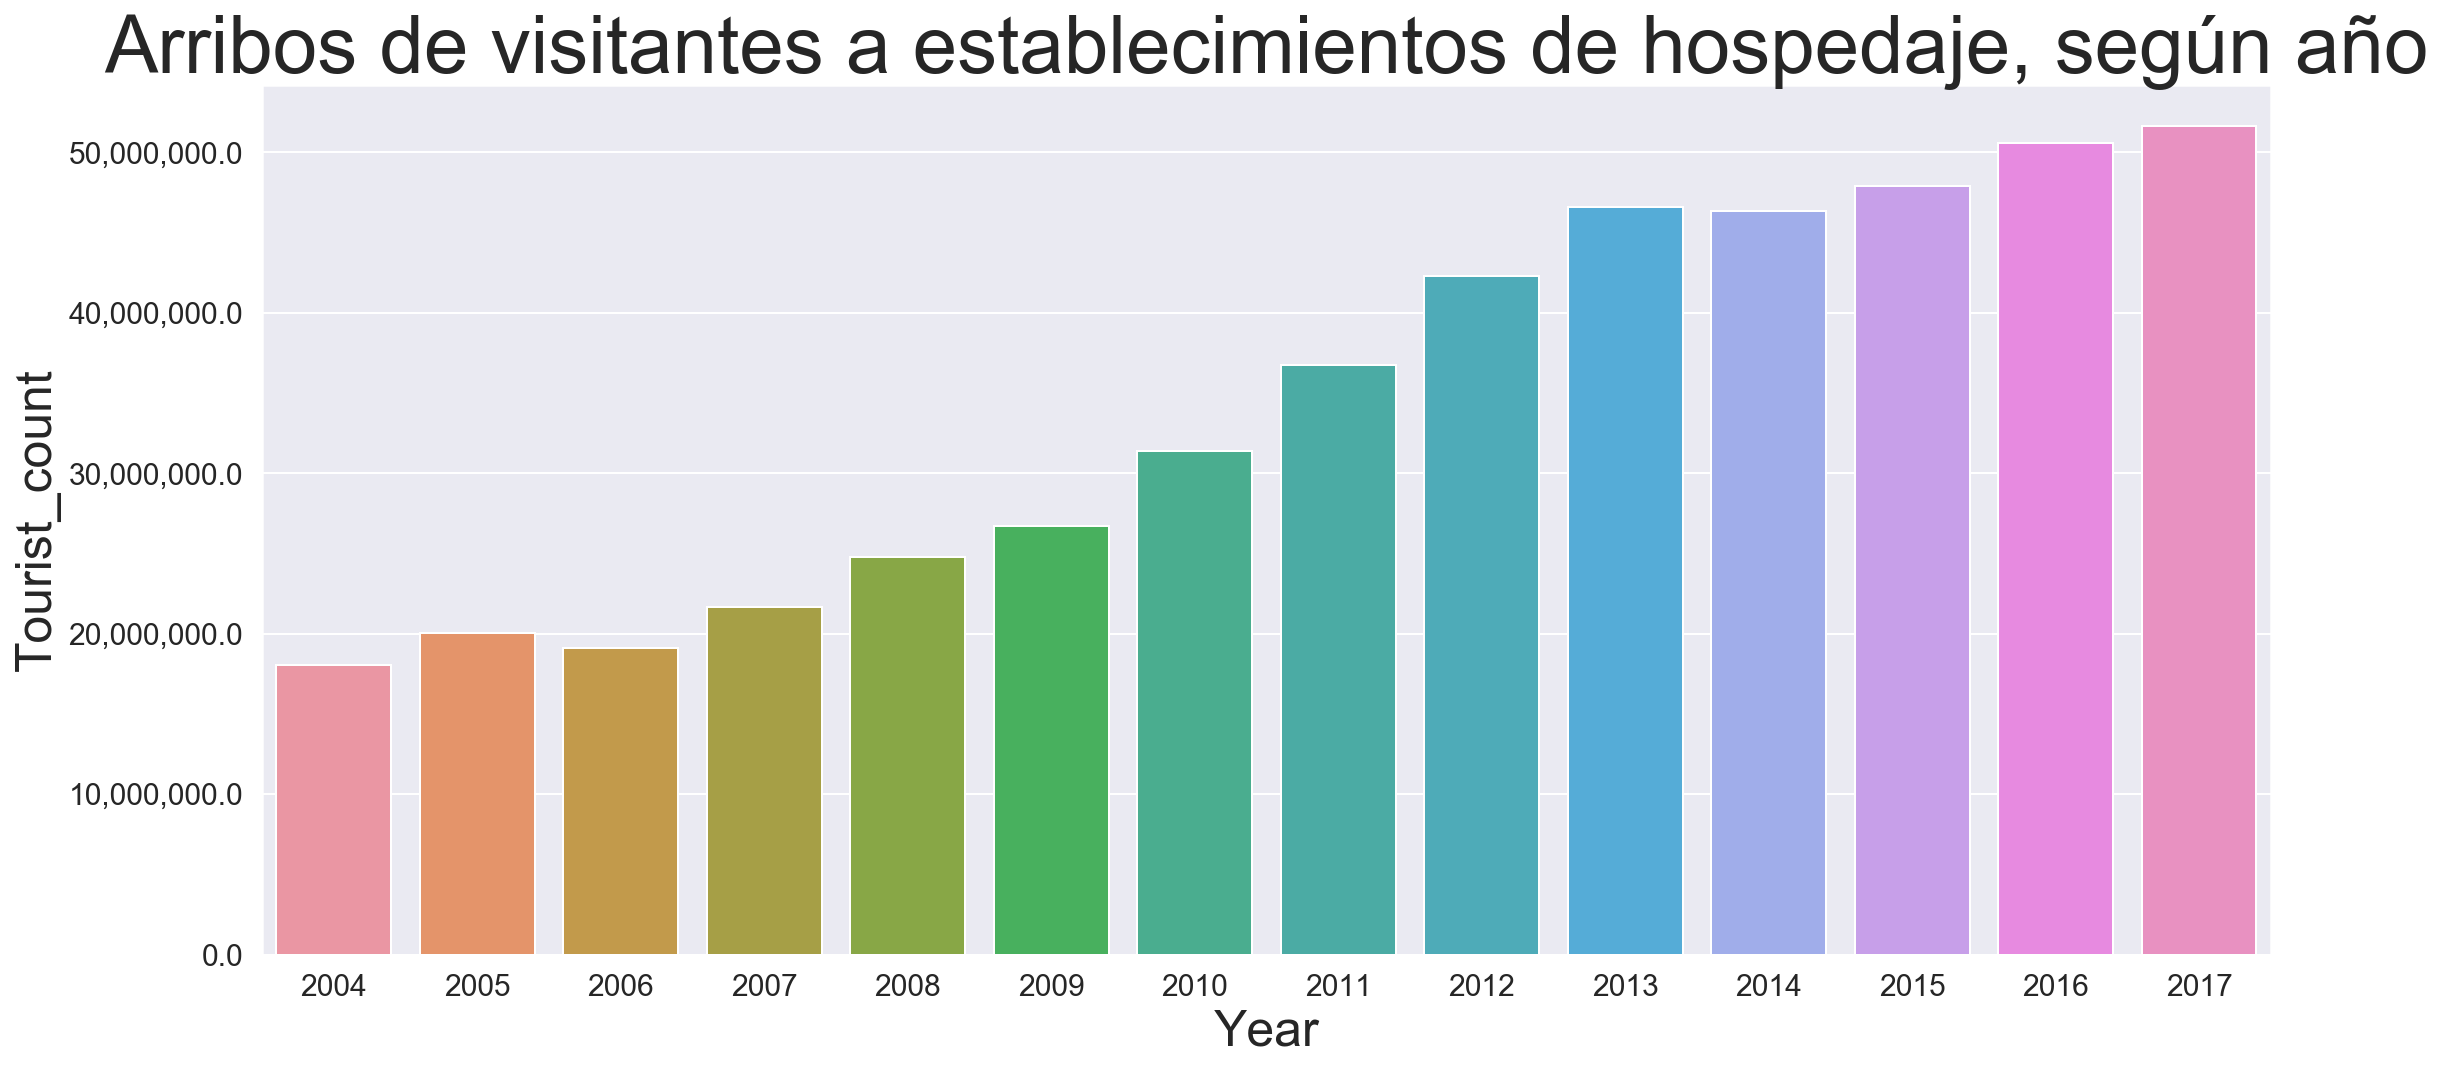

In [43]:
def clean_dataframe(df):
    df.dropna(axis=1,how='all',inplace=True)
    columns_navalue =  df.columns[df.isna().any()].tolist()
    # set last value
    if columns_navalue != []:
        df.ix[-1,columns_navalue] = df[columns_navalue].median()
        df[columns_navalue] = df[columns_navalue].interpolate()
        
def plot_df(df,by_month = False,title ='Tourist'):
    col_name = 'Year'
    dic = dict(x=col_name,y='Tourist_count')
    if by_month == True:
        df = df.T
        col_name = 'Region'
        dic = dict(y=col_name,x='Tourist_count')
    info = df.sum().to_frame().reset_index()
    info.columns = [col_name,'Tourist_count']
    sns.barplot(data=info,**dic)
    if by_month == False:
        yy, locs = plt.yticks()
        ll = ['{:,}'.format(a) for a in yy]
        plt.yticks(yy[:-1], ll[:-1])
    else:
        plt.xscale('log')
        xx, locs = plt.xticks()
        ll = ['{:,}'.format(a) for a in xx]
        plt.xticks(xx[:-1], ll[:-1])
    plt.title(title)
    plt.show();
        
def show_descriptive_data(name_file,by_region = False,title ='Tourist'):
    df = pd.read_excel(name_file,sheet_name='rptaniomest',nrows=25,
                           skiprows=3,index_col=0,)
    df = df.loc[:,df.columns.map(lambda x: x.isalnum())]
    clean_dataframe(df)
    plot_df(df,by_region,title)
    
show_descriptive_data('rptaniomest_a.xls',title='Arribos de visitantes a establecimientos de hospedaje, según año')

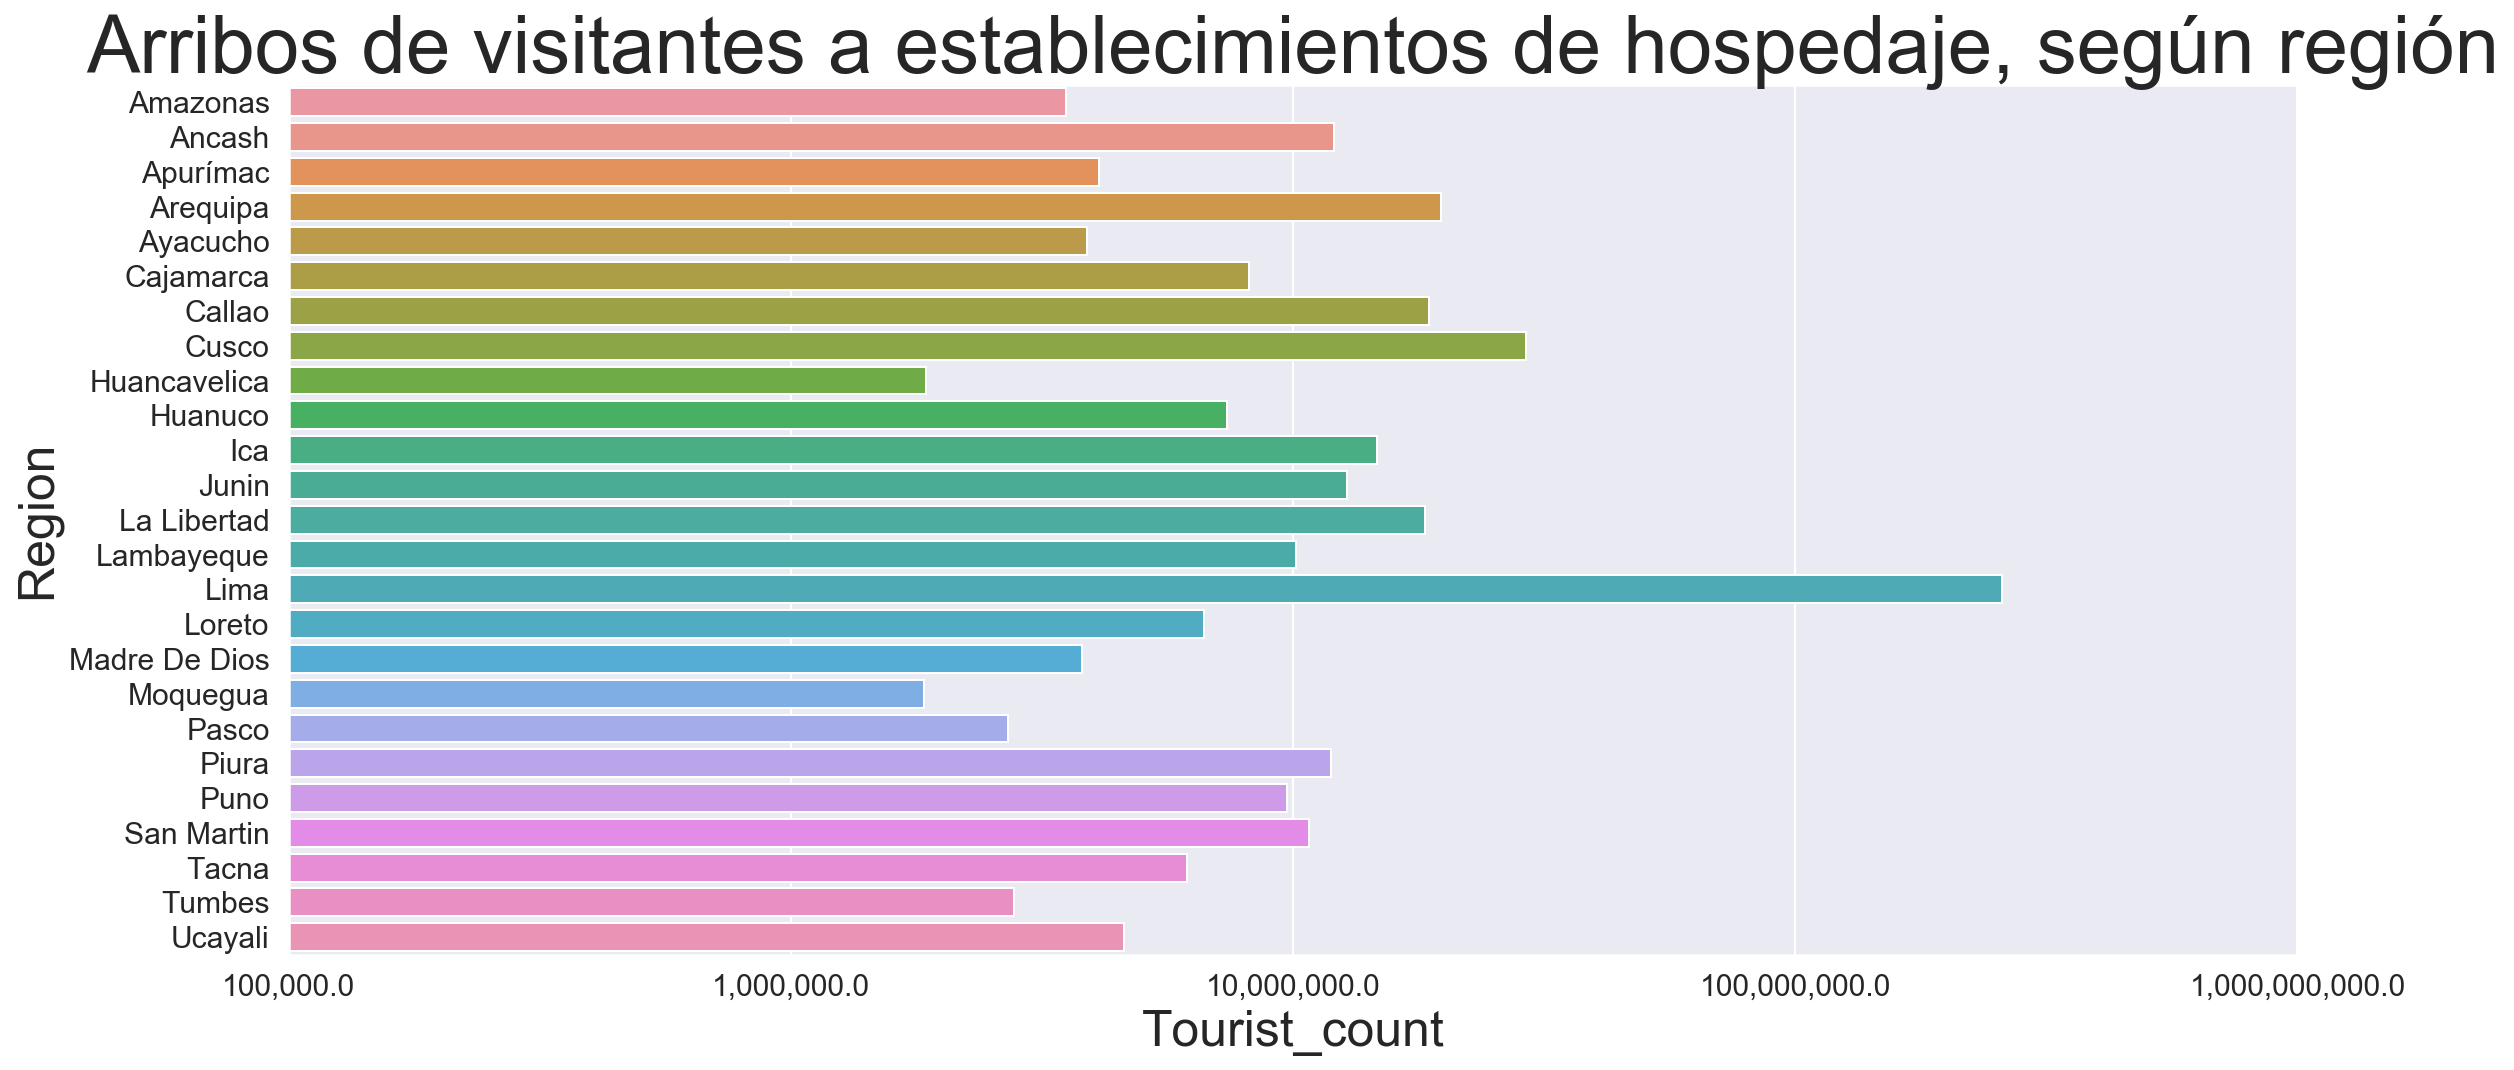

In [44]:
show_descriptive_data('rptaniomest_a.xls',by_region=True,title='Arribos de visitantes a establecimientos de hospedaje, según región')

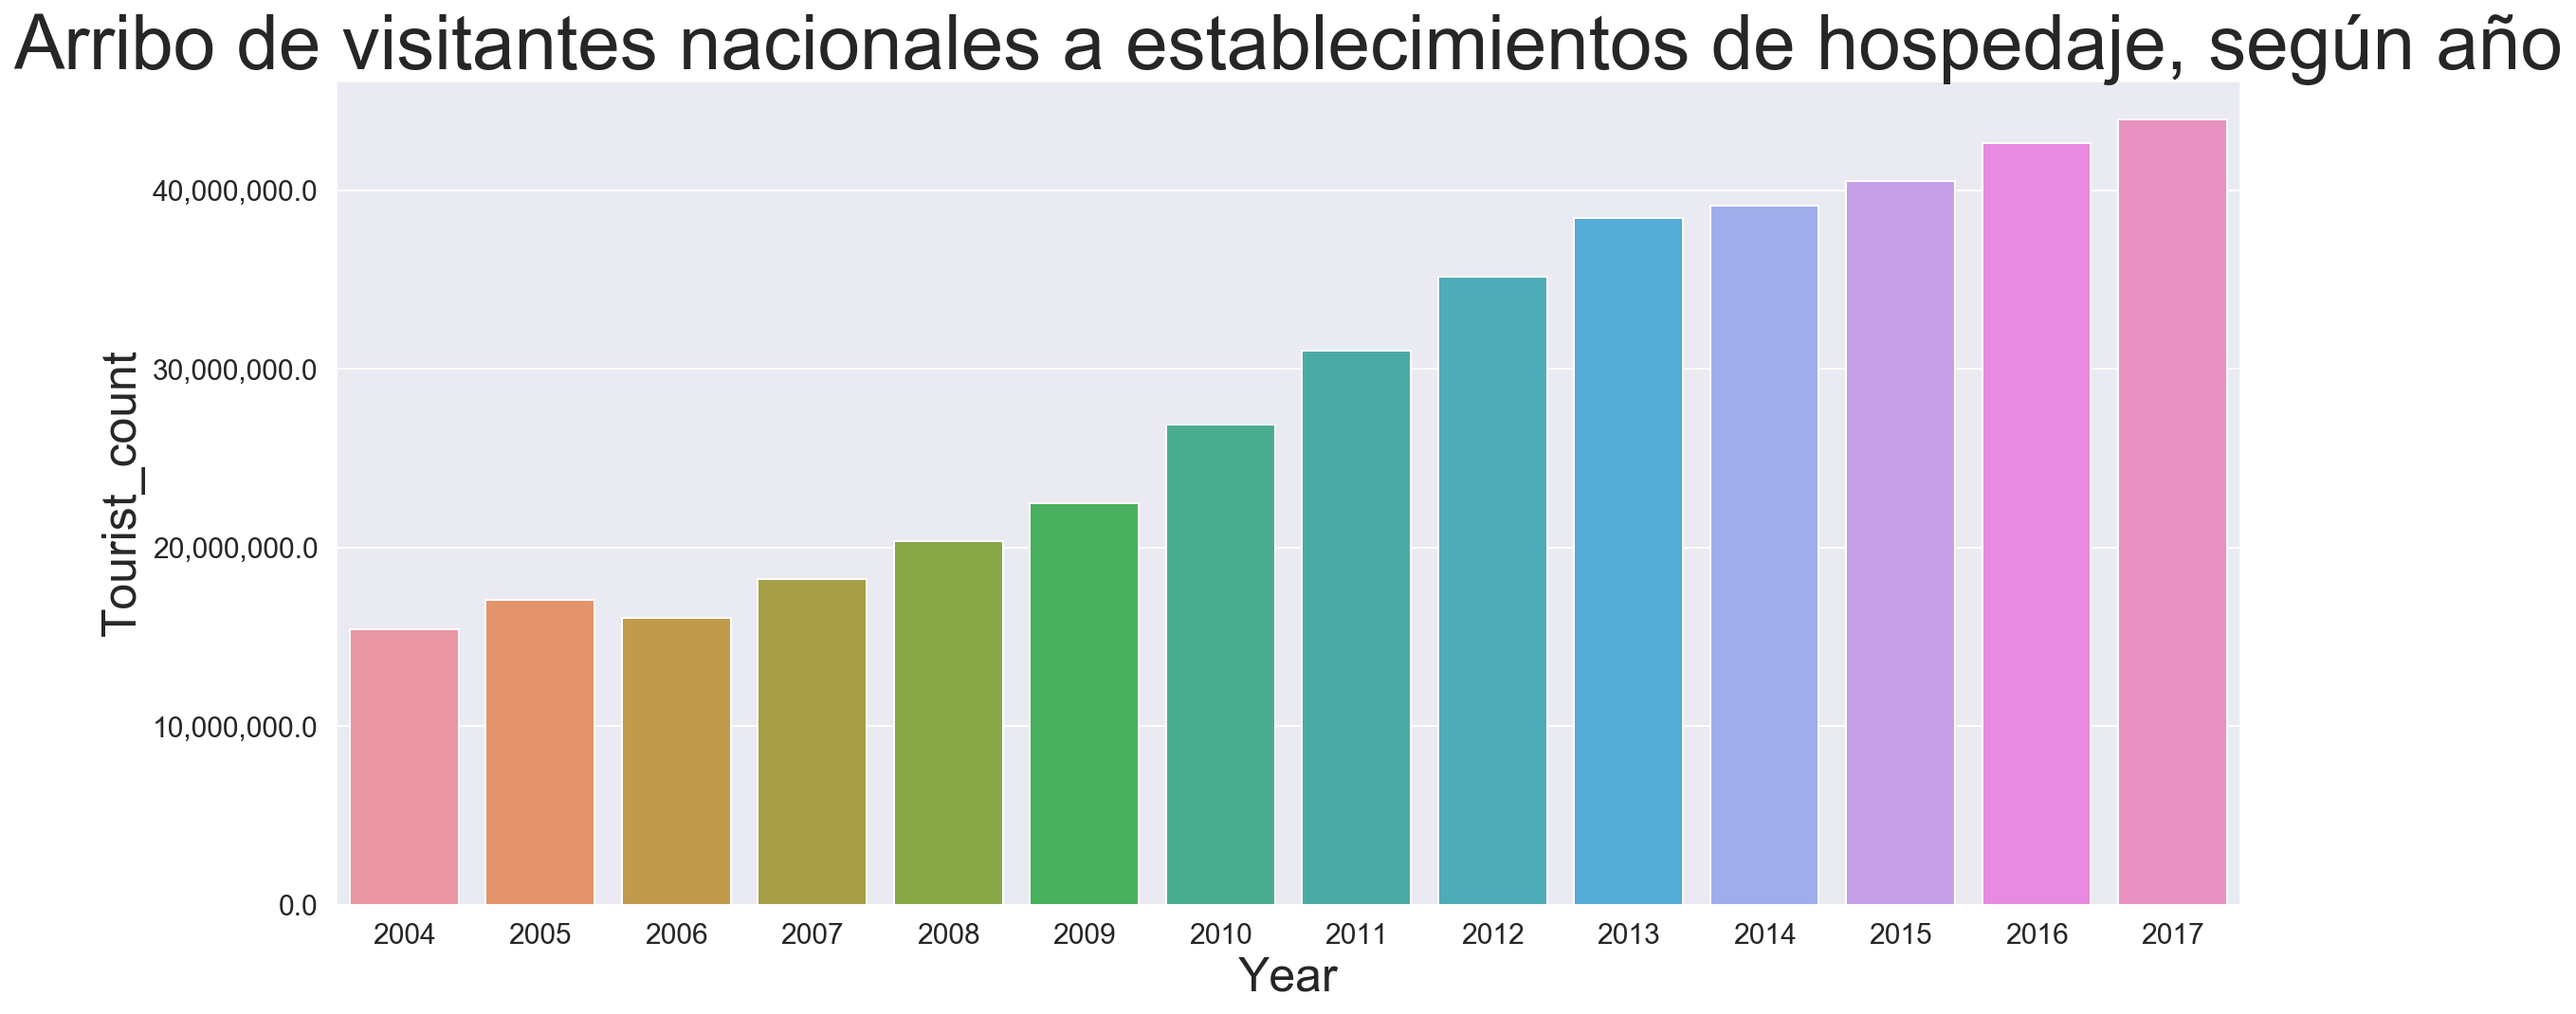

In [45]:
show_descriptive_data('rptaniomest_b.xls',title='Arribo de visitantes nacionales a establecimientos de hospedaje, según año')

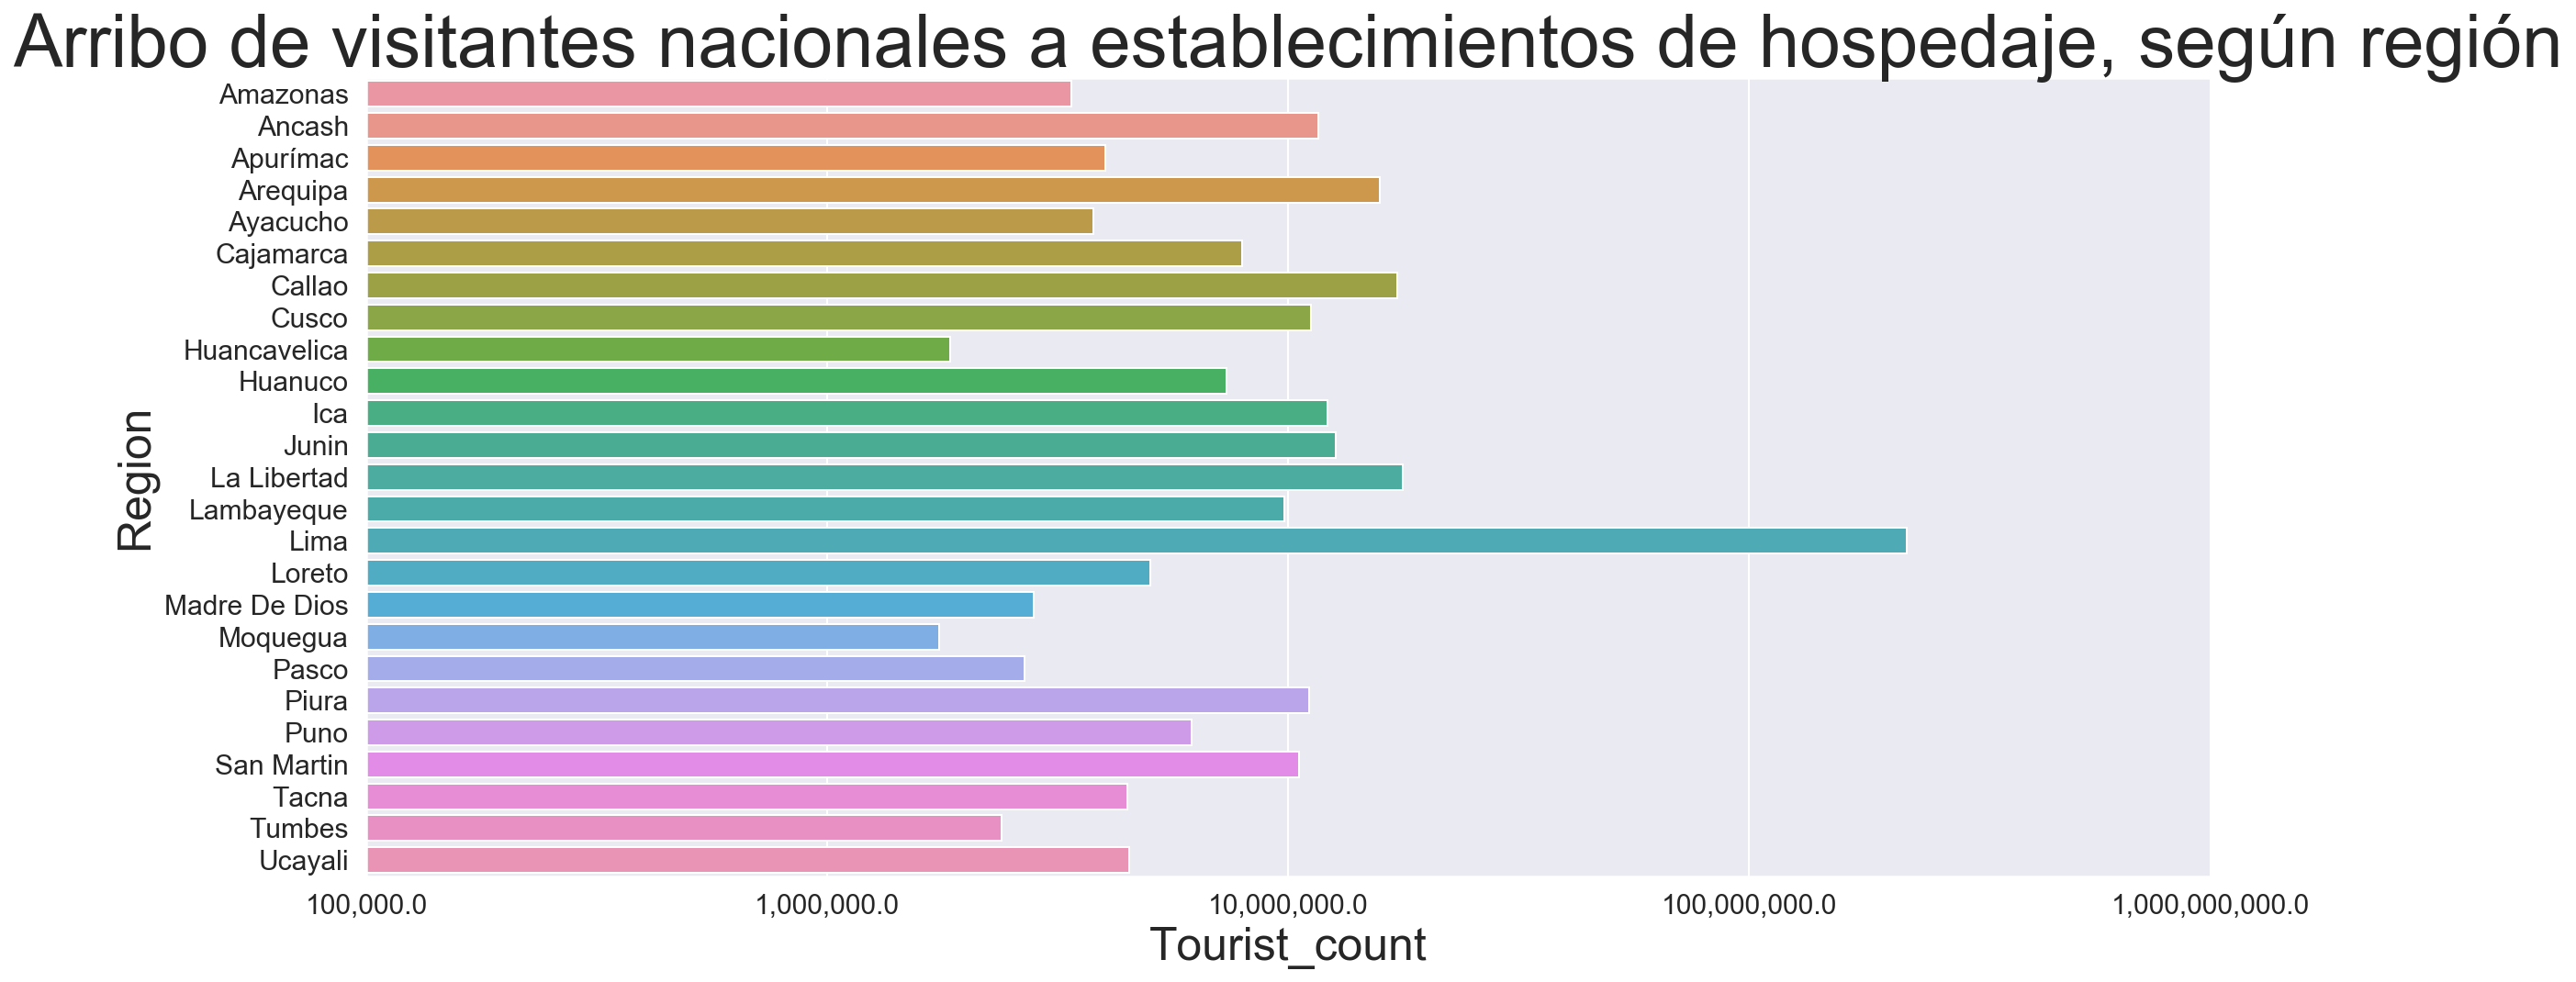

In [46]:
show_descriptive_data('rptaniomest_b.xls',by_region=True,title='Arribo de visitantes nacionales a establecimientos de hospedaje, según región')

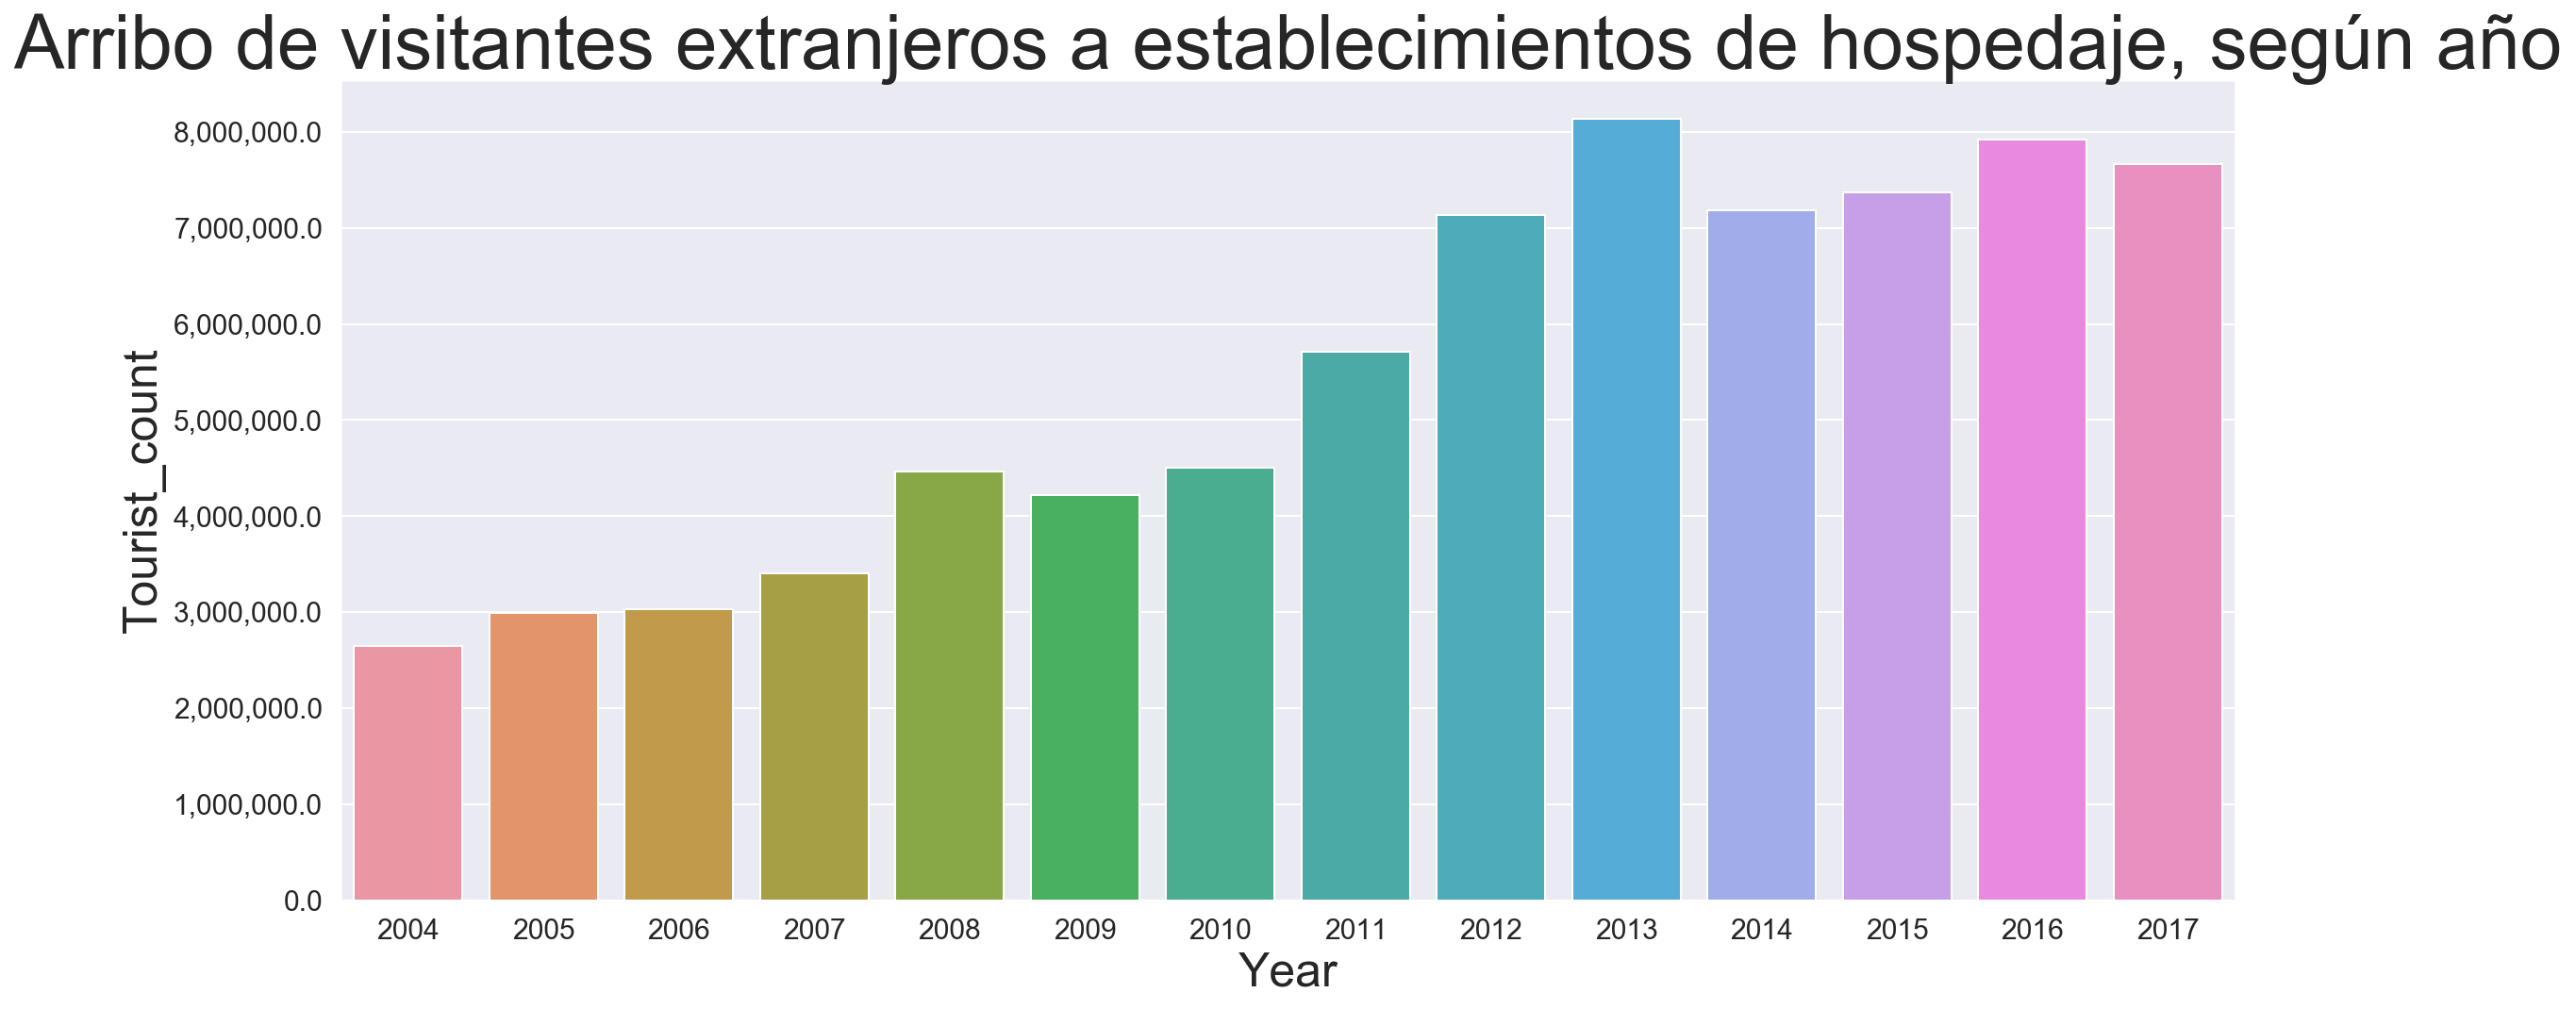

In [47]:
show_descriptive_data('rptaniomest_c.xls',title='Arribo de visitantes extranjeros a establecimientos de hospedaje, según año')

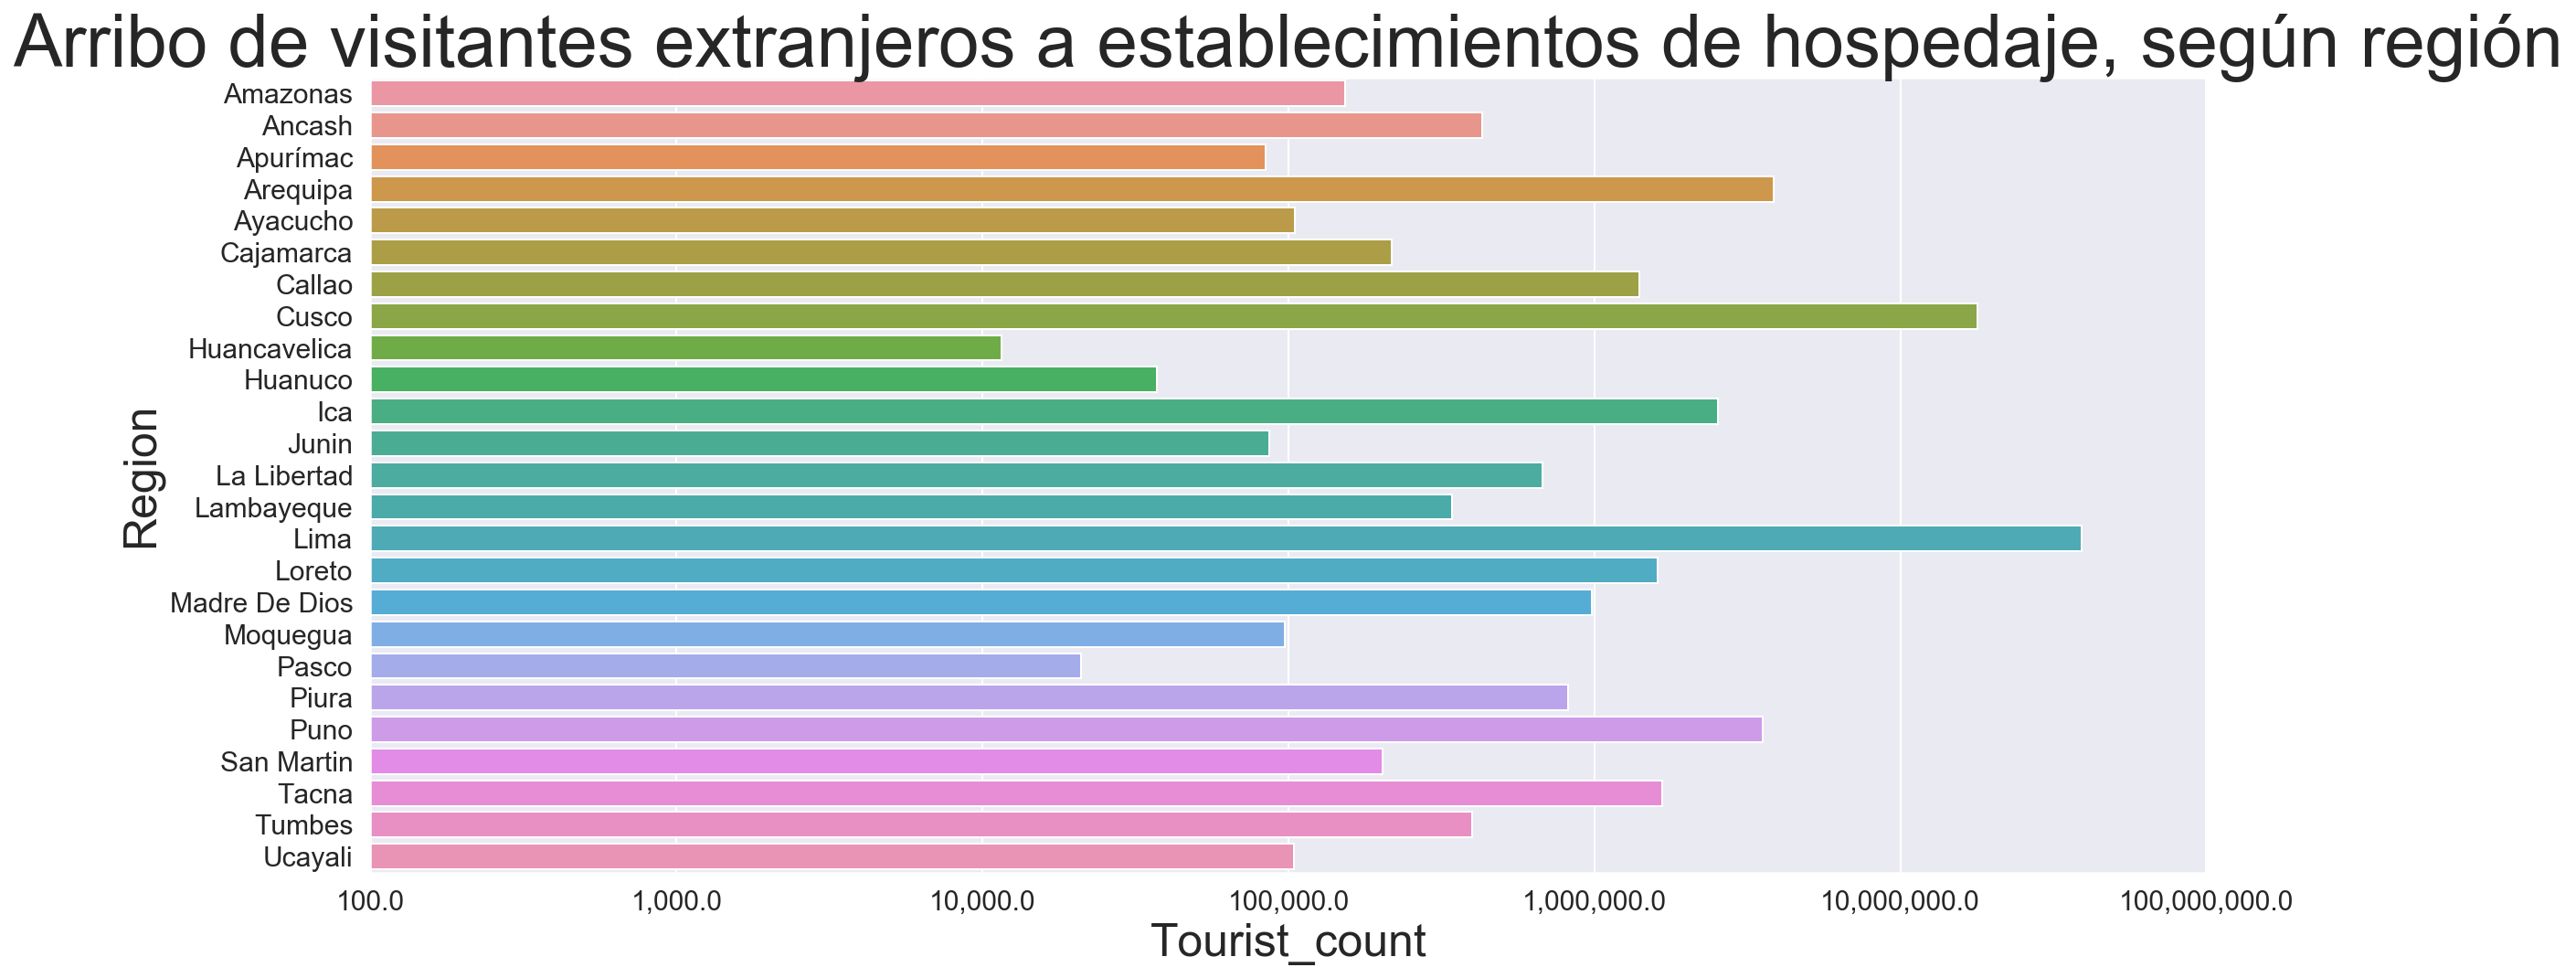

In [48]:
show_descriptive_data('rptaniomest_c.xls',by_region=True,title='Arribo de visitantes extranjeros a establecimientos de hospedaje, según región')

In [58]:
def predict_plot(name_file,title):
    df = pd.read_excel(name_file,sheet_name='rptaniomest',nrows=25,
                               skiprows=3,index_col=0,)
    df = df.loc[:,df.columns.map(lambda x: x.isalnum())]
    clean_dataframe(df)
    df=df.iloc[0,:].T
    df.index = pd.to_datetime(df.index)
    mod = sm.tsa.statespace.SARIMAX(df,
                                    order=(1, 1, 1),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
    pred = results.get_prediction(start=pd.to_datetime('2016-01-01'),end=pd.to_datetime('2019-01-01'), dynamic=False)
    pred_ci = pred.conf_int()
    ax = df['2004':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Furniture Sales')
    plt.title(title)
    plt.legend()
    plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9772      0.105      9.298      0.000       0.771       1.183
ma.L1         -0.4438      0.326     -1.363      0.173      -1.082       0.194
sigma2      2.456e+08   6.37e-11   3.86e+18      0.000    2.46e+08    2.46e+08


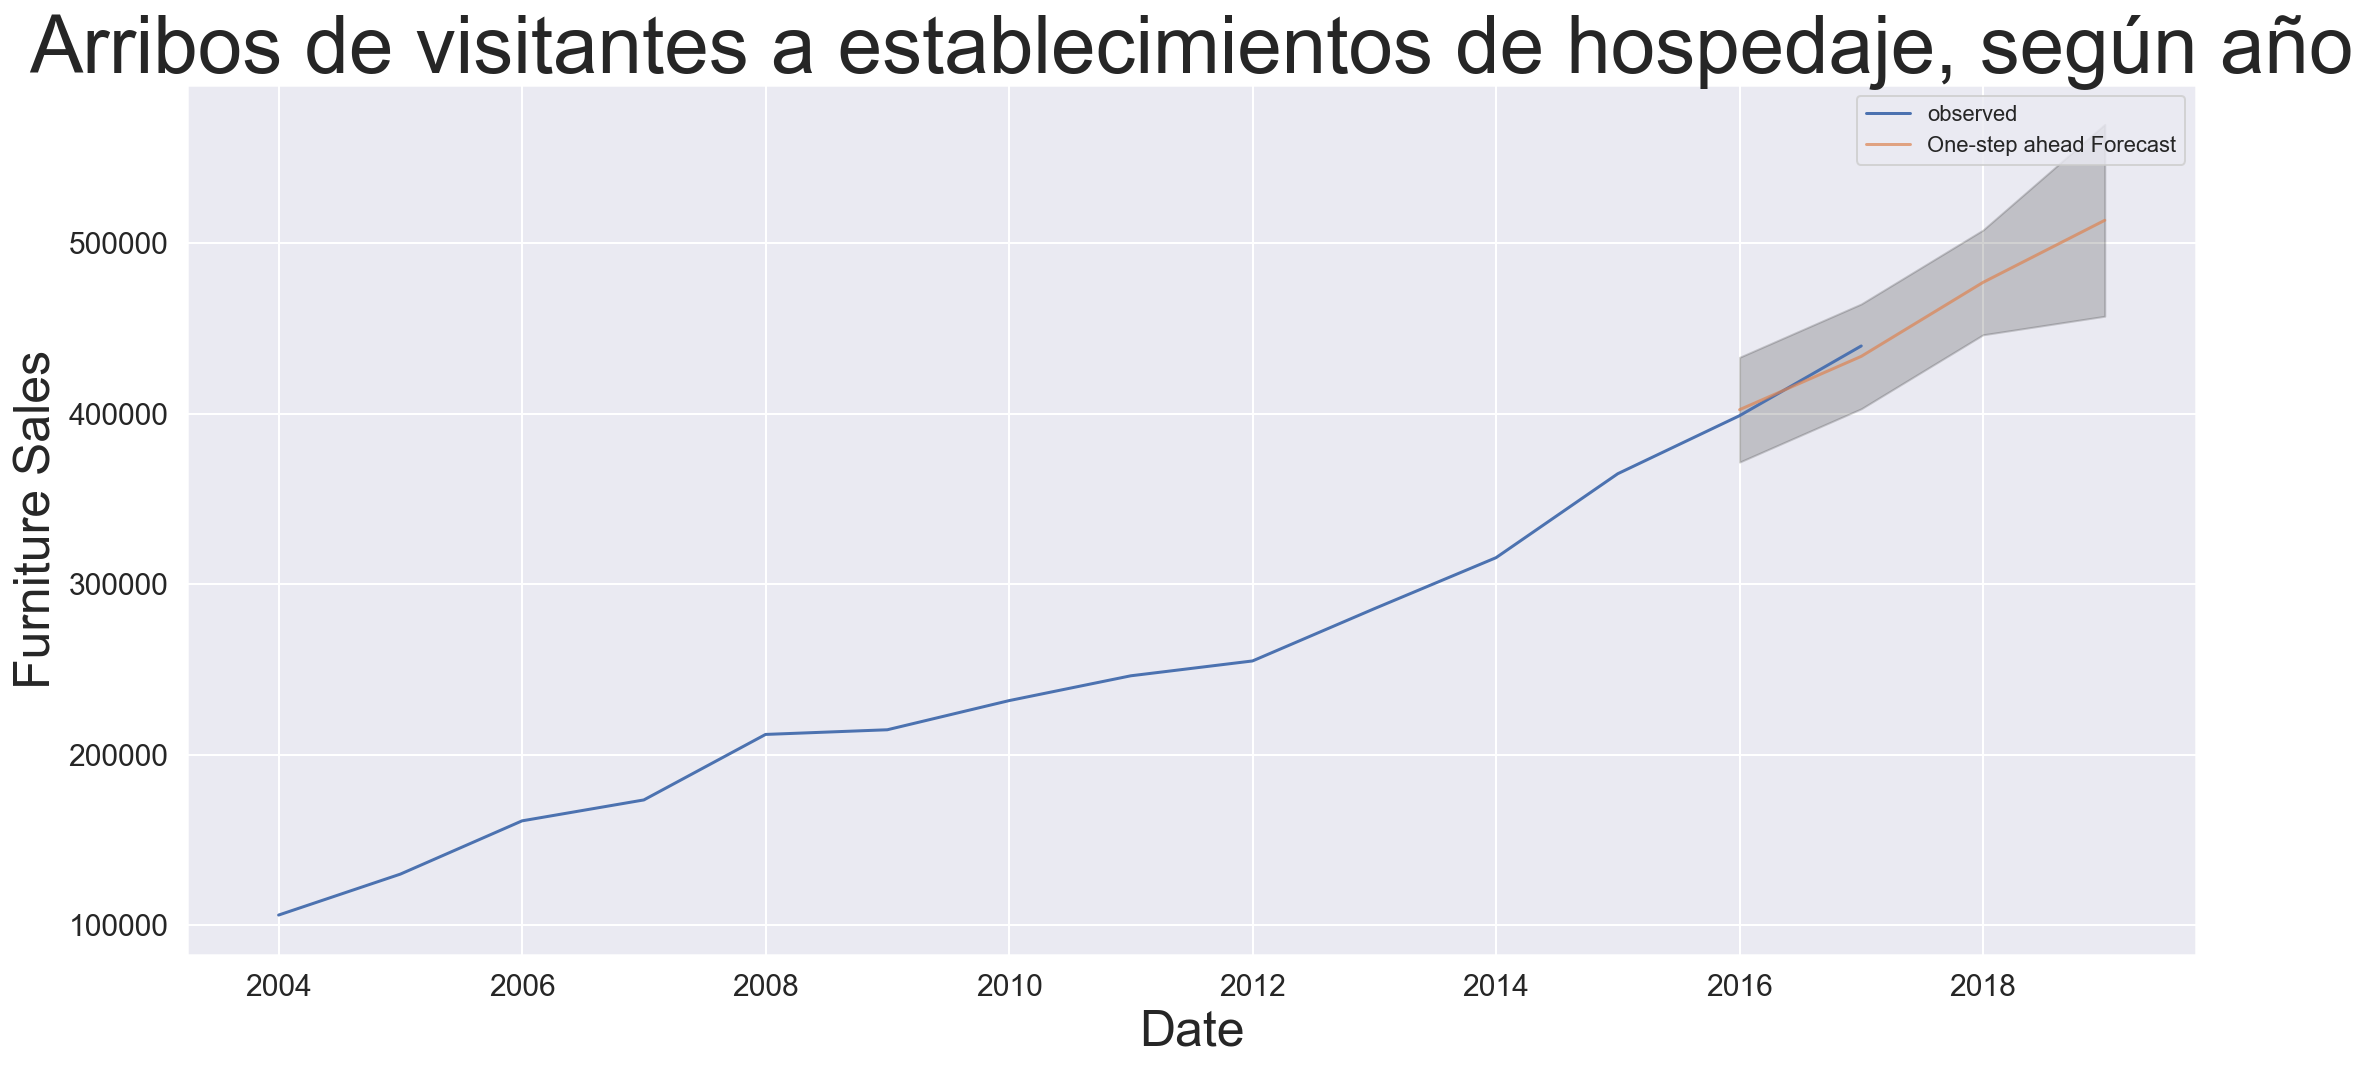

In [59]:
predict_plot('rptaniomest_a.xls',title='Arribos de visitantes a establecimientos de hospedaje, según año')

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9556      0.097      9.854      0.000       0.766       1.146
ma.L1         -0.4927      0.244     -2.016      0.044      -0.972      -0.014
sigma2      2.095e+08   1.32e-10   1.59e+18      0.000     2.1e+08     2.1e+08


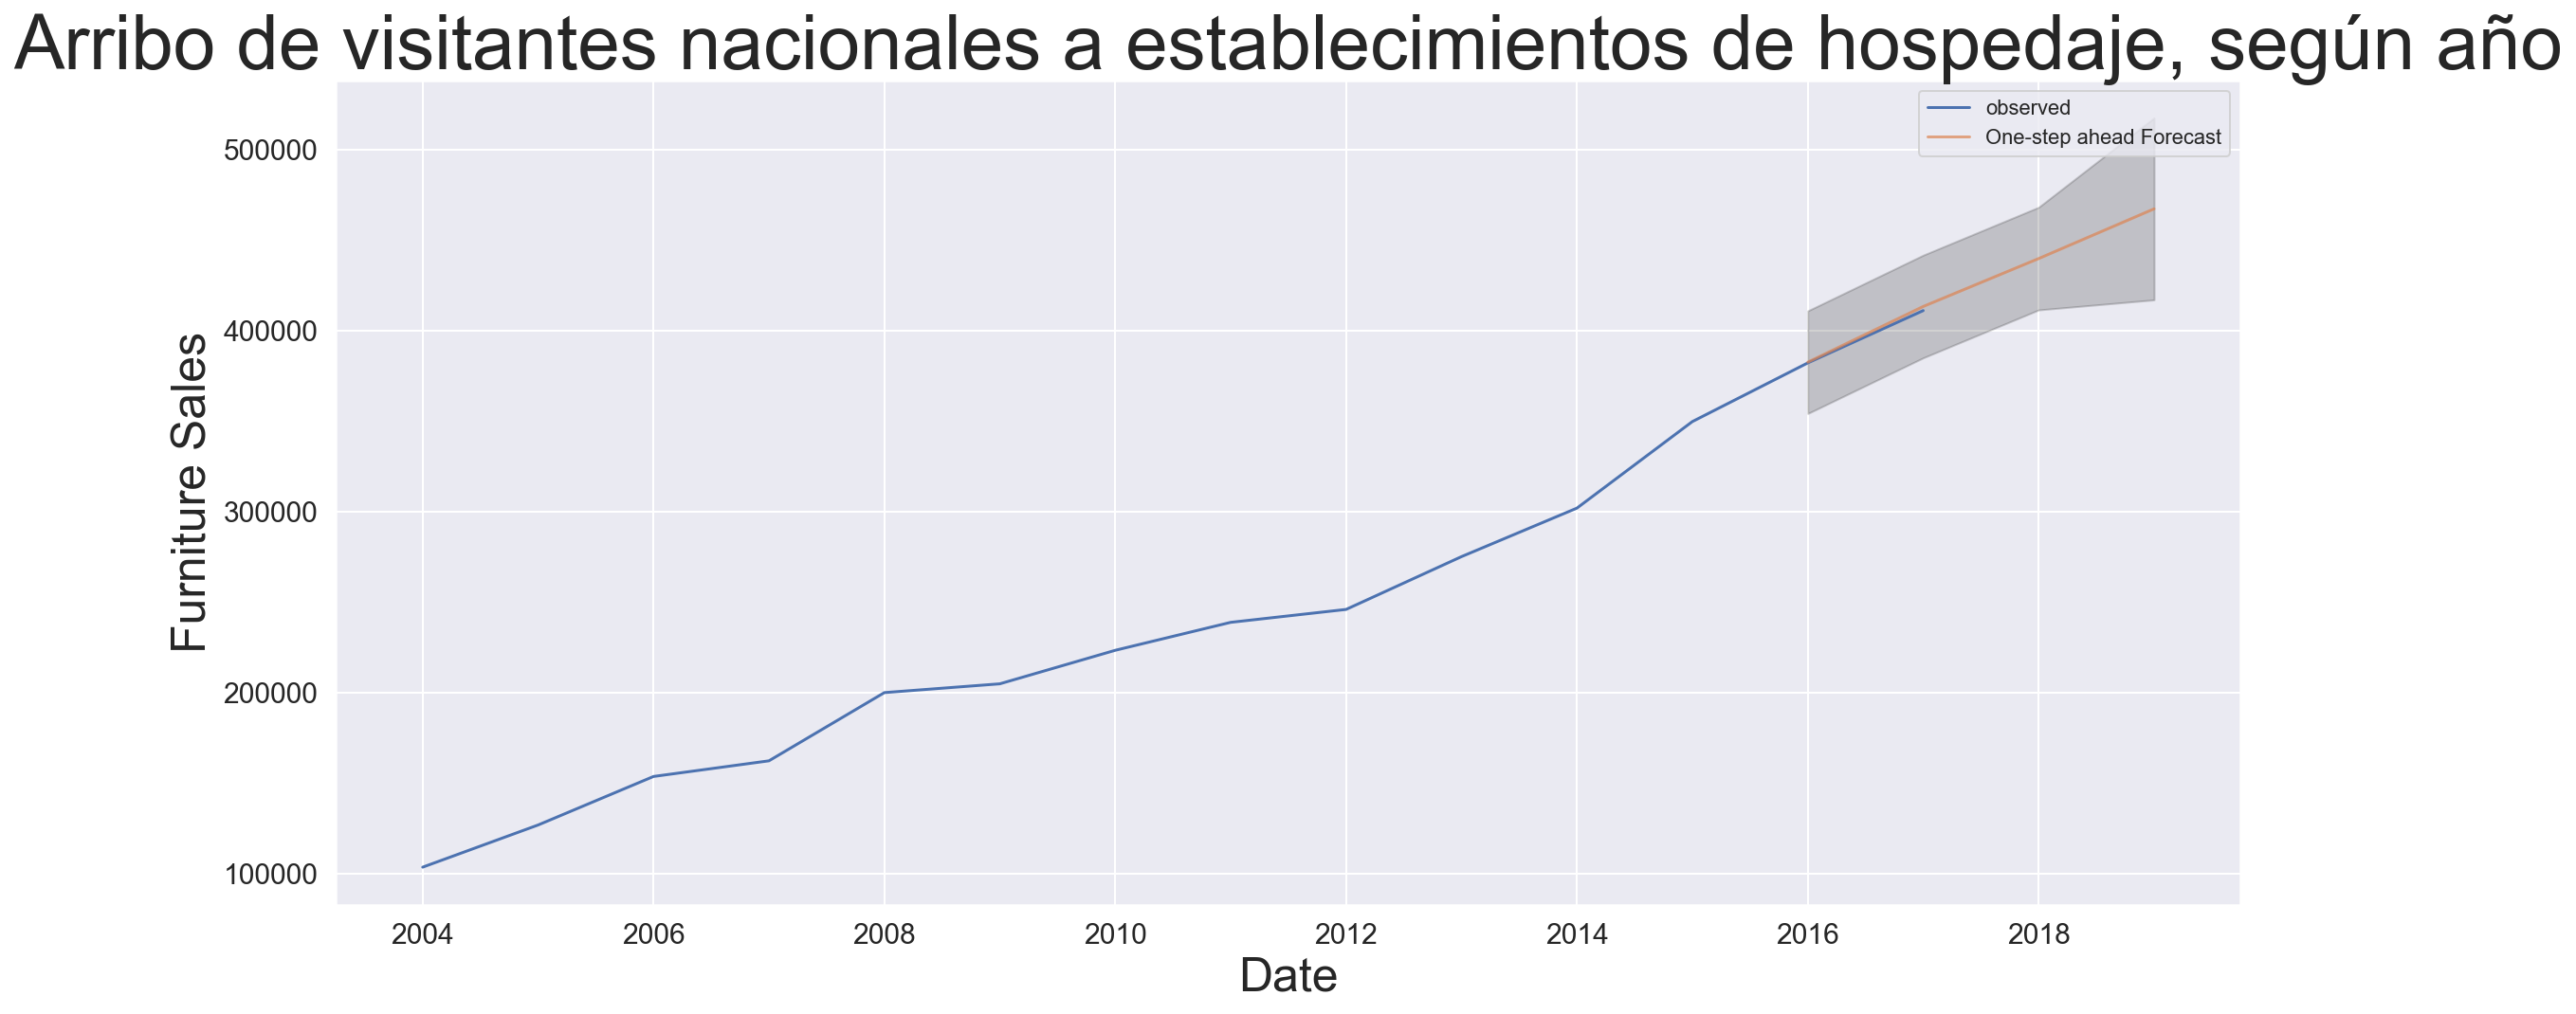

In [60]:
predict_plot('rptaniomest_b.xls',title='Arribo de visitantes nacionales a establecimientos de hospedaje, según año')

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5616      2.056      0.273      0.785      -3.469       4.592
ma.L1          0.5929      0.793      0.748      0.455      -0.961       2.147
sigma2      1.397e+07   9.77e-08   1.43e+14      0.000     1.4e+07     1.4e+07


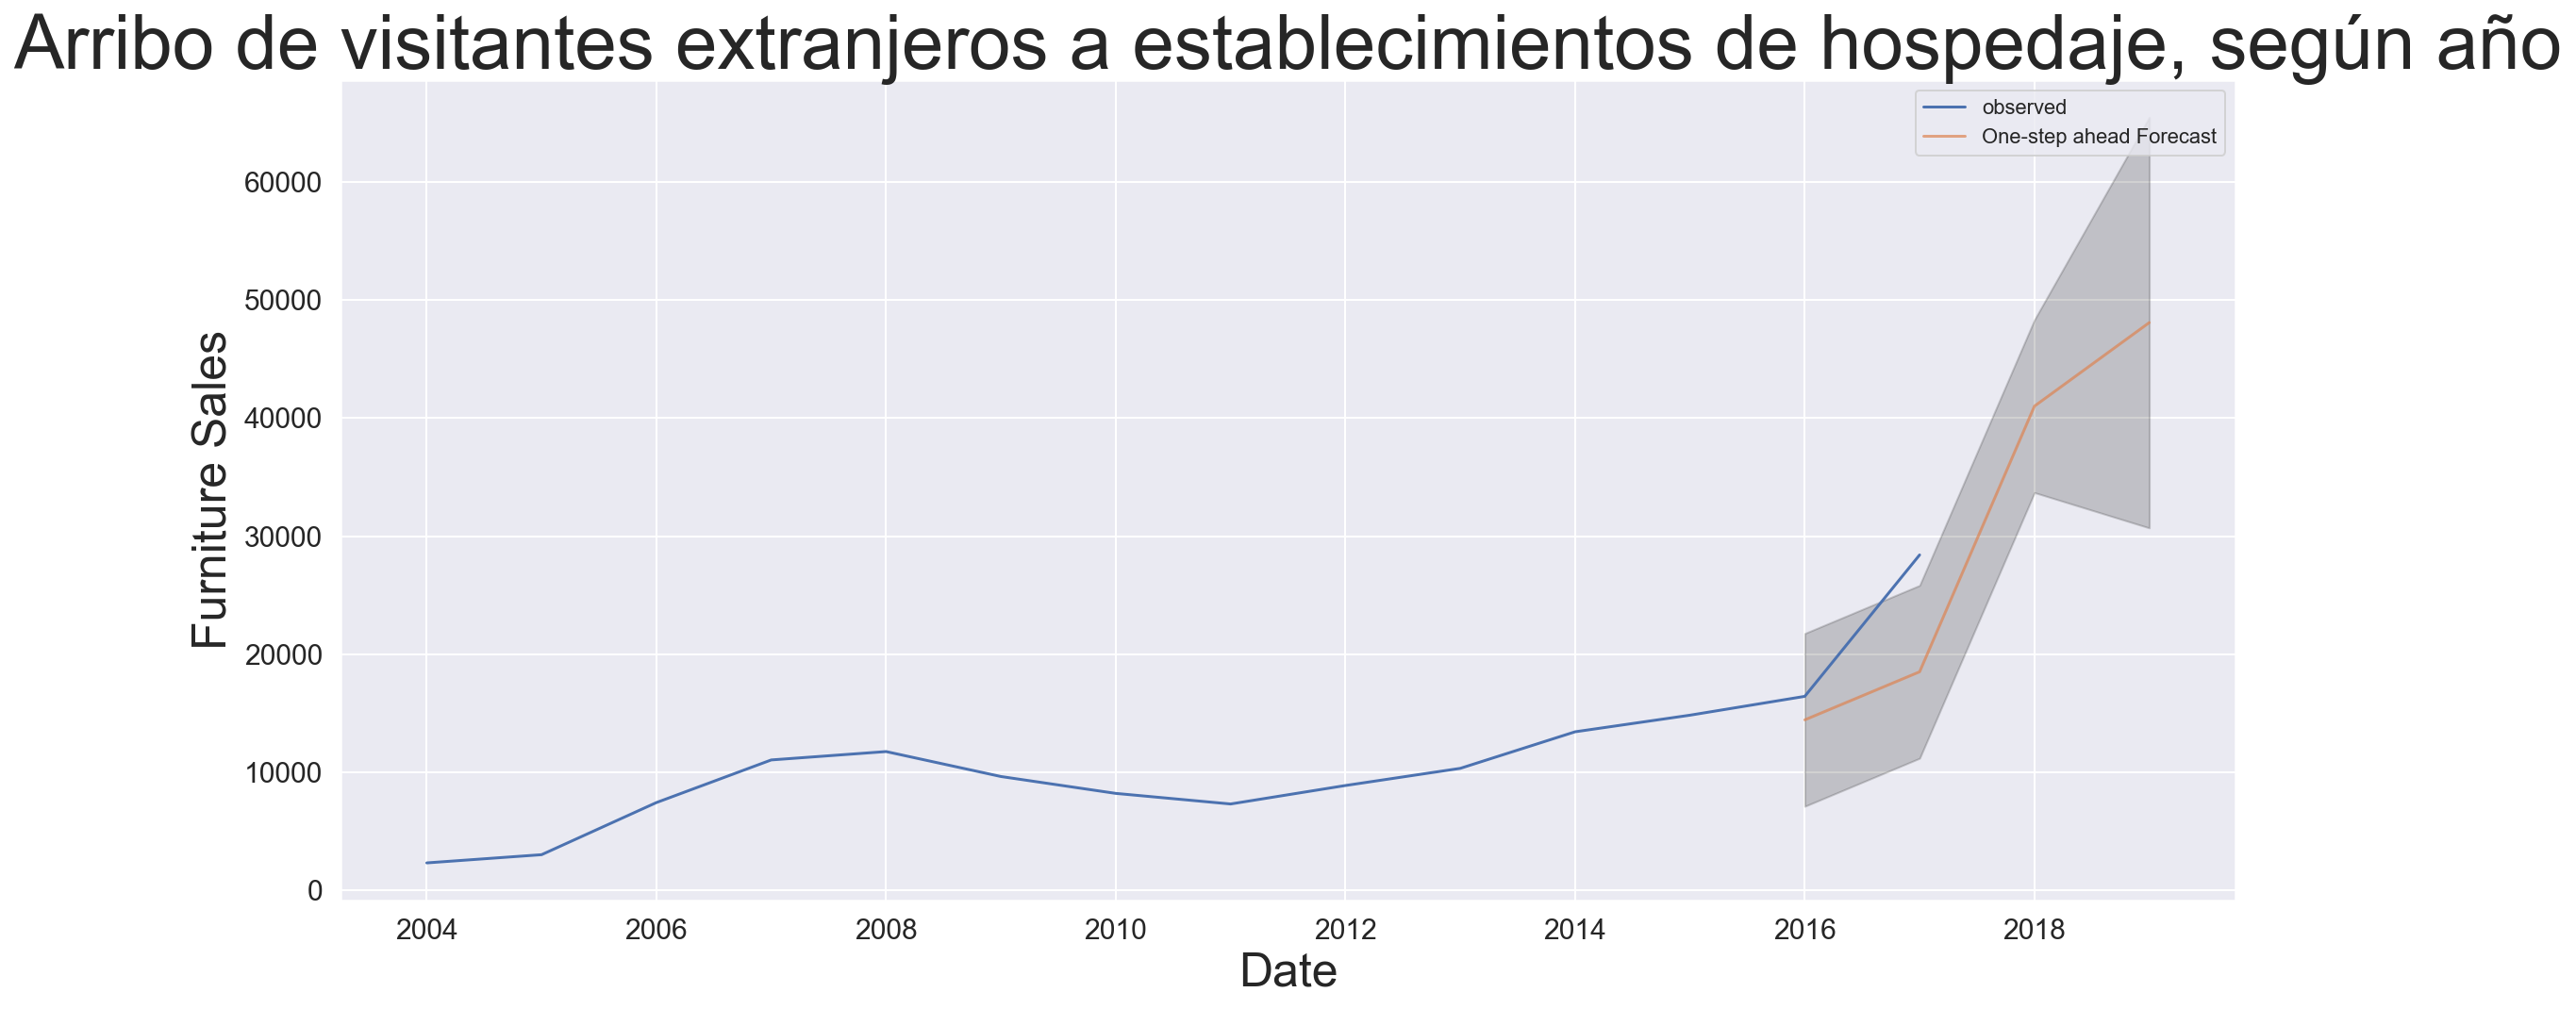

In [61]:
predict_plot('rptaniomest_c.xls',title='Arribo de visitantes extranjeros a establecimientos de hospedaje, según año')